**Group 8: Yu-Fang Liao, Han Nga Chan, Yumeng Tang**
---

In [1]:
#pip install matplotlib

In [2]:
#pip install -U scikit-learn scipy matplotlib

In [3]:
#pip install tensorflow

In [4]:
#pip install torch torchvision

# Logistic Regression

In [ ]:
main_directory = 'combine105_webscraping_v2'

In [ ]:
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

In [ ]:
# Hyperparameters

# 1st exp
configs = {
    "project_name": "ViT-20-Final",
    "experiment_name": "ViT-20-female-final",
    "freeze_feature_extraction_layers": True,
    "pretrained":True,
    "efficientnet":False,
    "data_augmentation":False,
    "transferlearning": True,

    # Data
    "img_dimensions" : (3,224,224),
    "batch_size" : 32,
    "num_classes" : 20,

    # CNN
    "filter_sizes" : [4,8],
    "kernel_size" : 3,
    "stride": 2,
    "padding":1,

    #Optimzation
    "learning_rate" : 0.001,
    "epochs" : 10,
    "weight_decay" : 0.00001
}

In [ ]:
# Transformations
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
if configs["data_augmentation"]:
  transform = transforms.Compose([
      transforms.RandomHorizontalFlip(0.5),
      transforms.Resize(224),
      transforms.RandomCrop(224),
      transforms.RandomRotation(45),
      transforms.ColorJitter(),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                      std=[0.229, 0.224, 0.225])
  ])
else:
  transform = transforms.Compose([
      transforms.Resize(224),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                      std=[0.229, 0.224, 0.225])
  ])


import torchvision
whole_dataset = torchvision.datasets.ImageFolder(main_directory, transform=transform)
train_dataset, val_dataset = random_split(whole_dataset, [0.7, 0.3])
test_dataset, val_dataset = random_split(val_dataset, [0.5, 0.5])

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=configs["batch_size"], shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=configs["batch_size"], shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=configs["batch_size"], shuffle=False)

In [ ]:
model = LogisticRegression(solver='saga')

In [ ]:
#Preparing the dataset to be fit in logistic regression
image_data_list = []
labels_list = []

# Iterate through train_dataset and extract image data and labels
for image, label in train_dataset:
    # Convert image tensor to NumPy array and flatten it
    image_np = image.numpy().flatten()
    # Append flattened image data to the list
    image_data_list.append(image_np)
    # Append label to the labels list
    labels_list.append(label)

# Convert the lists to DataFrames
df_image_data = pd.DataFrame(image_data_list)
df_labels = pd.DataFrame(labels_list, columns=['Label'])

# Concatenate image data DataFrame and labels DataFrame along columns
df_combined = pd.concat([df_image_data, df_labels], axis=1)

In [7]:
#Extract X and y in dataset
X = df_combined.drop(columns=['Label'])
y = df_combined['Label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
model.fit(x_train, y_train)

/usr4/ba820/hnchan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [ ]:
from sklearn.metrics import accuracy_score
# Predict on the testing set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.03349282296650718

In [ ]:
score = model.score(x_test, y_test)
print("The accuracy score is:", score*100)

The accuracy score is: 3.349282296650718


The accuracy of the logistic regression is about 3.34% given all images.

# Model for 20 classes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil

# used to supress display of warnings
import warnings

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

In [ ]:
enable_wandb = True
use_gpu = True

In [ ]:
gpu_available = torch.cuda.is_available()
gpu_available

True

In [ ]:
import os
os.environ["WANDB_NOTEBOOK_NAME"] = "model-20-ep10.ipynb"


In [ ]:
if enable_wandb:
  !pip install wandb -qU
  import wandb
  wandb.login()

wandb: Currently logged in as: hnchan (hnchan01). Use `wandb login --relogin` to force relogin


In [ ]:
# Hyperparameters

# 1st exp
configs = {
    "project_name": "ViT-20-Final",
    "experiment_name": "ViT-20-female-final",
    "freeze_feature_extraction_layers": True,
    "pretrained":True,
    "efficientnet":False,
    "data_augmentation":False,
    "transferlearning": True,

    # Data
    "img_dimensions" : (3,224,224),
    "batch_size" : 32,
    "num_classes" : 20,

    # CNN
    "filter_sizes" : [4,8],
    "kernel_size" : 3,
    "stride": 2,
    "padding":1,

    #Optimzation
    "learning_rate" : 0.001,
    "epochs" : 10,
    "weight_decay" : 0.00001
}



In [6]:
# ! pip install opencv-python

## Female Model

In [ ]:
main_directory = 'female'

In [ ]:
# Transformations
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
if configs["data_augmentation"]:
  transform = transforms.Compose([
      transforms.RandomHorizontalFlip(0.5), # 50% of the person will flip
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.RandomCrop(224),
      transforms.RandomRotation(45), # Random rotate
      transforms.ColorJitter(),
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])
else:
  transform = transforms.Compose([
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.CenterCrop(224),
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])


import torchvision
whole_dataset = torchvision.datasets.ImageFolder(main_directory, transform=transform)
train_dataset, val_dataset = random_split(whole_dataset, [0.7, 0.3])
test_dataset, val_dataset = random_split(val_dataset, [0.5, 0.5])

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=configs["batch_size"], shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=configs["batch_size"], shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=configs["batch_size"], shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


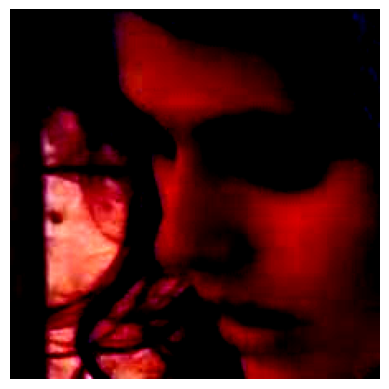

In [ ]:
image_tensor = train_dataset[3][0]

# Convert the image tensor to a NumPy array and rearrange the dimensions
# Assuming the tensor is in (C, H, W) format (channels, height, width)
image_np = np.transpose(image_tensor.numpy(), (1, 2, 0))

# Display the image
plt.imshow(image_np)
plt.axis('off')
plt.show()

### **Data Preparation**

In [ ]:
# use torch-summary for more info on the model
!pip install torchinfo

Defaulting to user installation because normal site-packages is not writeable


In [5]:
#!pip install transformers

In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

2024-04-25 10:43:12.250620: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-25 10:43:14.353542: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 10:43:24.316868: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
#print(model)

In [ ]:
model.classifier = torch.nn.Sequential(torch.nn.Linear(768, 100), torch.nn.ReLU(), torch.nn.Linear(100, configs["num_classes"], torch.nn.Softmax()))

In [ ]:
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True

### Loss: Cross-Entropy

In [ ]:
criterion = nn.CrossEntropyLoss()

### Optimizer: SGD

In [ ]:
optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=configs["learning_rate"], weight_decay=configs["weight_decay"])

### Accuracy and Loss function

In [ ]:
if enable_wandb:
  wandb.init(
    # Set the project where this run will be logged
    project=configs["project_name"],
    # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
    name=configs["experiment_name"],
    # Track hyperparameters and run metadata
    config=configs)

In [ ]:
def get_accuracy(dataloader, model):
  acc = 0
  # <OR>
  # acc = torchmetrics.Accuracy()

  with torch.no_grad():
      for images, labels in dataloader:
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          outputs = model(images) # get predictions

          # Update accuracy for this batch
          raw_logits = outputs.logits
          acc = acc + torch.sum(torch.argmax(raw_logits, axis=1) == labels)


      # Compute the accuracy
      acc = acc/len(dataloader.dataset) # normalizes

      return acc



In [ ]:
def get_loss(loader):
  with torch.no_grad():

    loss = 0
    for i, (images, labels) in enumerate(loader): # The batches.
          # step1: Move data to cuda. Make sure the model is on cuda too!
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          # step2: Forward pass
          outputs = model(images)


          # step 3: calculate the loss.
          raw_logits = outputs.logits
          loss = loss + criterion(raw_logits, labels)
    return loss/ len(loader)

### Early-stopping class

In [ ]:
class EarlyStopper:
    def __init__(self, patience=1):
        self.patience = patience
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        # If the new loss is lower than the old loss, reset the counter!
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
            # Keep track of the best model by saving it on the hard drive.
            torch.save(model.state_dict(), "./best_model.pt")
        # otherwise, increment the counter.
        elif validation_loss > self.min_validation_loss:
            self.counter += 1
            # If there has been too many epochs with the loss being high, terminate.
            if self.counter >= self.patience:
                return True
        return False


### Training

In [ ]:
if gpu_available and use_gpu:
  model = model.cuda()

In [ ]:
early_stopper = EarlyStopper(patience=7)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.3, patience=3)

# Training loop
for epoch in range(configs["epochs"]): # The epochs.
    for i, (images, labels) in enumerate(train_loader): # The batches.
        # step 1: Zero out the gradients.
        optimizer.zero_grad()

        # step 1.1 move data to cuda. Make sure the model is on cuda too!
        if gpu_available and use_gpu:
          images = images.cuda()
          labels = labels.cuda()

        # step2: Forward pass
        outputs = model(images)

        # step 3: calculate the loss.
        raw_logits = outputs.logits
        loss = criterion(raw_logits, labels)

        # step 4: Backward pass
        loss.backward()
        optimizer.step()

        # Print the loss
        if i %100 == 0:
          print("Epoch", epoch+ 1, " batch", i+1, ". Training Loss: ", loss.item())
          if enable_wandb:
            wandb.log({"loss": loss})

    # Compute total train accuracy
    train_acc = get_accuracy(train_loader, model)
    test_acc = get_accuracy(val_loader, model)

    validation_loss = get_loss(val_loader)
    wandb.log({"val_loss": validation_loss})

    print(f'Epoch [{epoch + 1}/{configs["epochs"]}], LR: {optimizer.param_groups[0]["lr"]}, Validation Loss: {validation_loss.item():.4f}, Train Accuracy: {train_acc.item():.4f}, Validation Accuracy: {test_acc.item():.4f}')
    if enable_wandb:
      wandb.log({"epoch": epoch + 1, "LR": {optimizer.param_groups[0]['lr']}, "train_accuracy": train_acc.item(), "val_accuracy": test_acc.item()})

    scheduler.step(validation_loss)

    if early_stopper.early_stop(validation_loss):
        print("Validation loss hasn't dropped. Early stopping!")
        break



Epoch 1  batch 1 . Training Loss:  3.040513038635254
Epoch 1  batch 101 . Training Loss:  2.876732349395752
Epoch [1/10], LR: 0.001, Validation Loss: 2.8211, Train Accuracy: 0.1940, Validation Accuracy: 0.1829
Epoch 2  batch 1 . Training Loss:  2.8879306316375732
Epoch 2  batch 101 . Training Loss:  2.6038029193878174
Epoch [2/10], LR: 0.001, Validation Loss: 2.5473, Train Accuracy: 0.3179, Validation Accuracy: 0.2735
Epoch 3  batch 1 . Training Loss:  2.466494560241699
Epoch 3  batch 101 . Training Loss:  2.2973921298980713
Epoch [3/10], LR: 0.001, Validation Loss: 2.2888, Train Accuracy: 0.3964, Validation Accuracy: 0.3319
Epoch 4  batch 1 . Training Loss:  2.168661594390869
Epoch 4  batch 101 . Training Loss:  2.25370717048645
Epoch [4/10], LR: 0.001, Validation Loss: 2.1311, Train Accuracy: 0.4184, Validation Accuracy: 0.3293
Epoch 5  batch 1 . Training Loss:  2.066908597946167
Epoch 5  batch 101 . Training Loss:  1.9488011598587036
Epoch [5/10], LR: 0.001, Validation Loss: 1.9846,

### Test

In [ ]:
print("last model performance on Test set:", get_accuracy(test_loader, model))

# Once training is done, load the best model (might not be the last model due to early stopping)
model.load_state_dict(torch.load("./best_model.pt"))
acc = get_accuracy(test_loader, model)
print("best model performance Test set:", acc)

if enable_wandb:
  wandb.summary['Test Accuracy'] = acc.item()

last model performance on Test set: tensor(0.5257, device='cuda:0')
best model performance Test set: tensor(0.5257, device='cuda:0')


In [ ]:
if enable_wandb:
  wandb.finish()

epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▇▆▅▅▄▅▄▃▂▂▂▃▂▁▂▁▂▁
train_accuracy,▁▃▄▅▅▆▇▇██
val_accuracy,▁▃▄▄▅▆▇▇▇█
val_loss,█▆▅▄▃▂▂▂▁▁
Test Accuracy,0.52567
epoch,10
loss,1.45914
train_accuracy,0.6122
val_accuracy,0.51568
val_loss,1.61042


The model has a training accuracy of 0.6122 and test accuracy is about 0.5257.

In [ ]:
female_model = model.eval()  # Set the model to evaluation mode

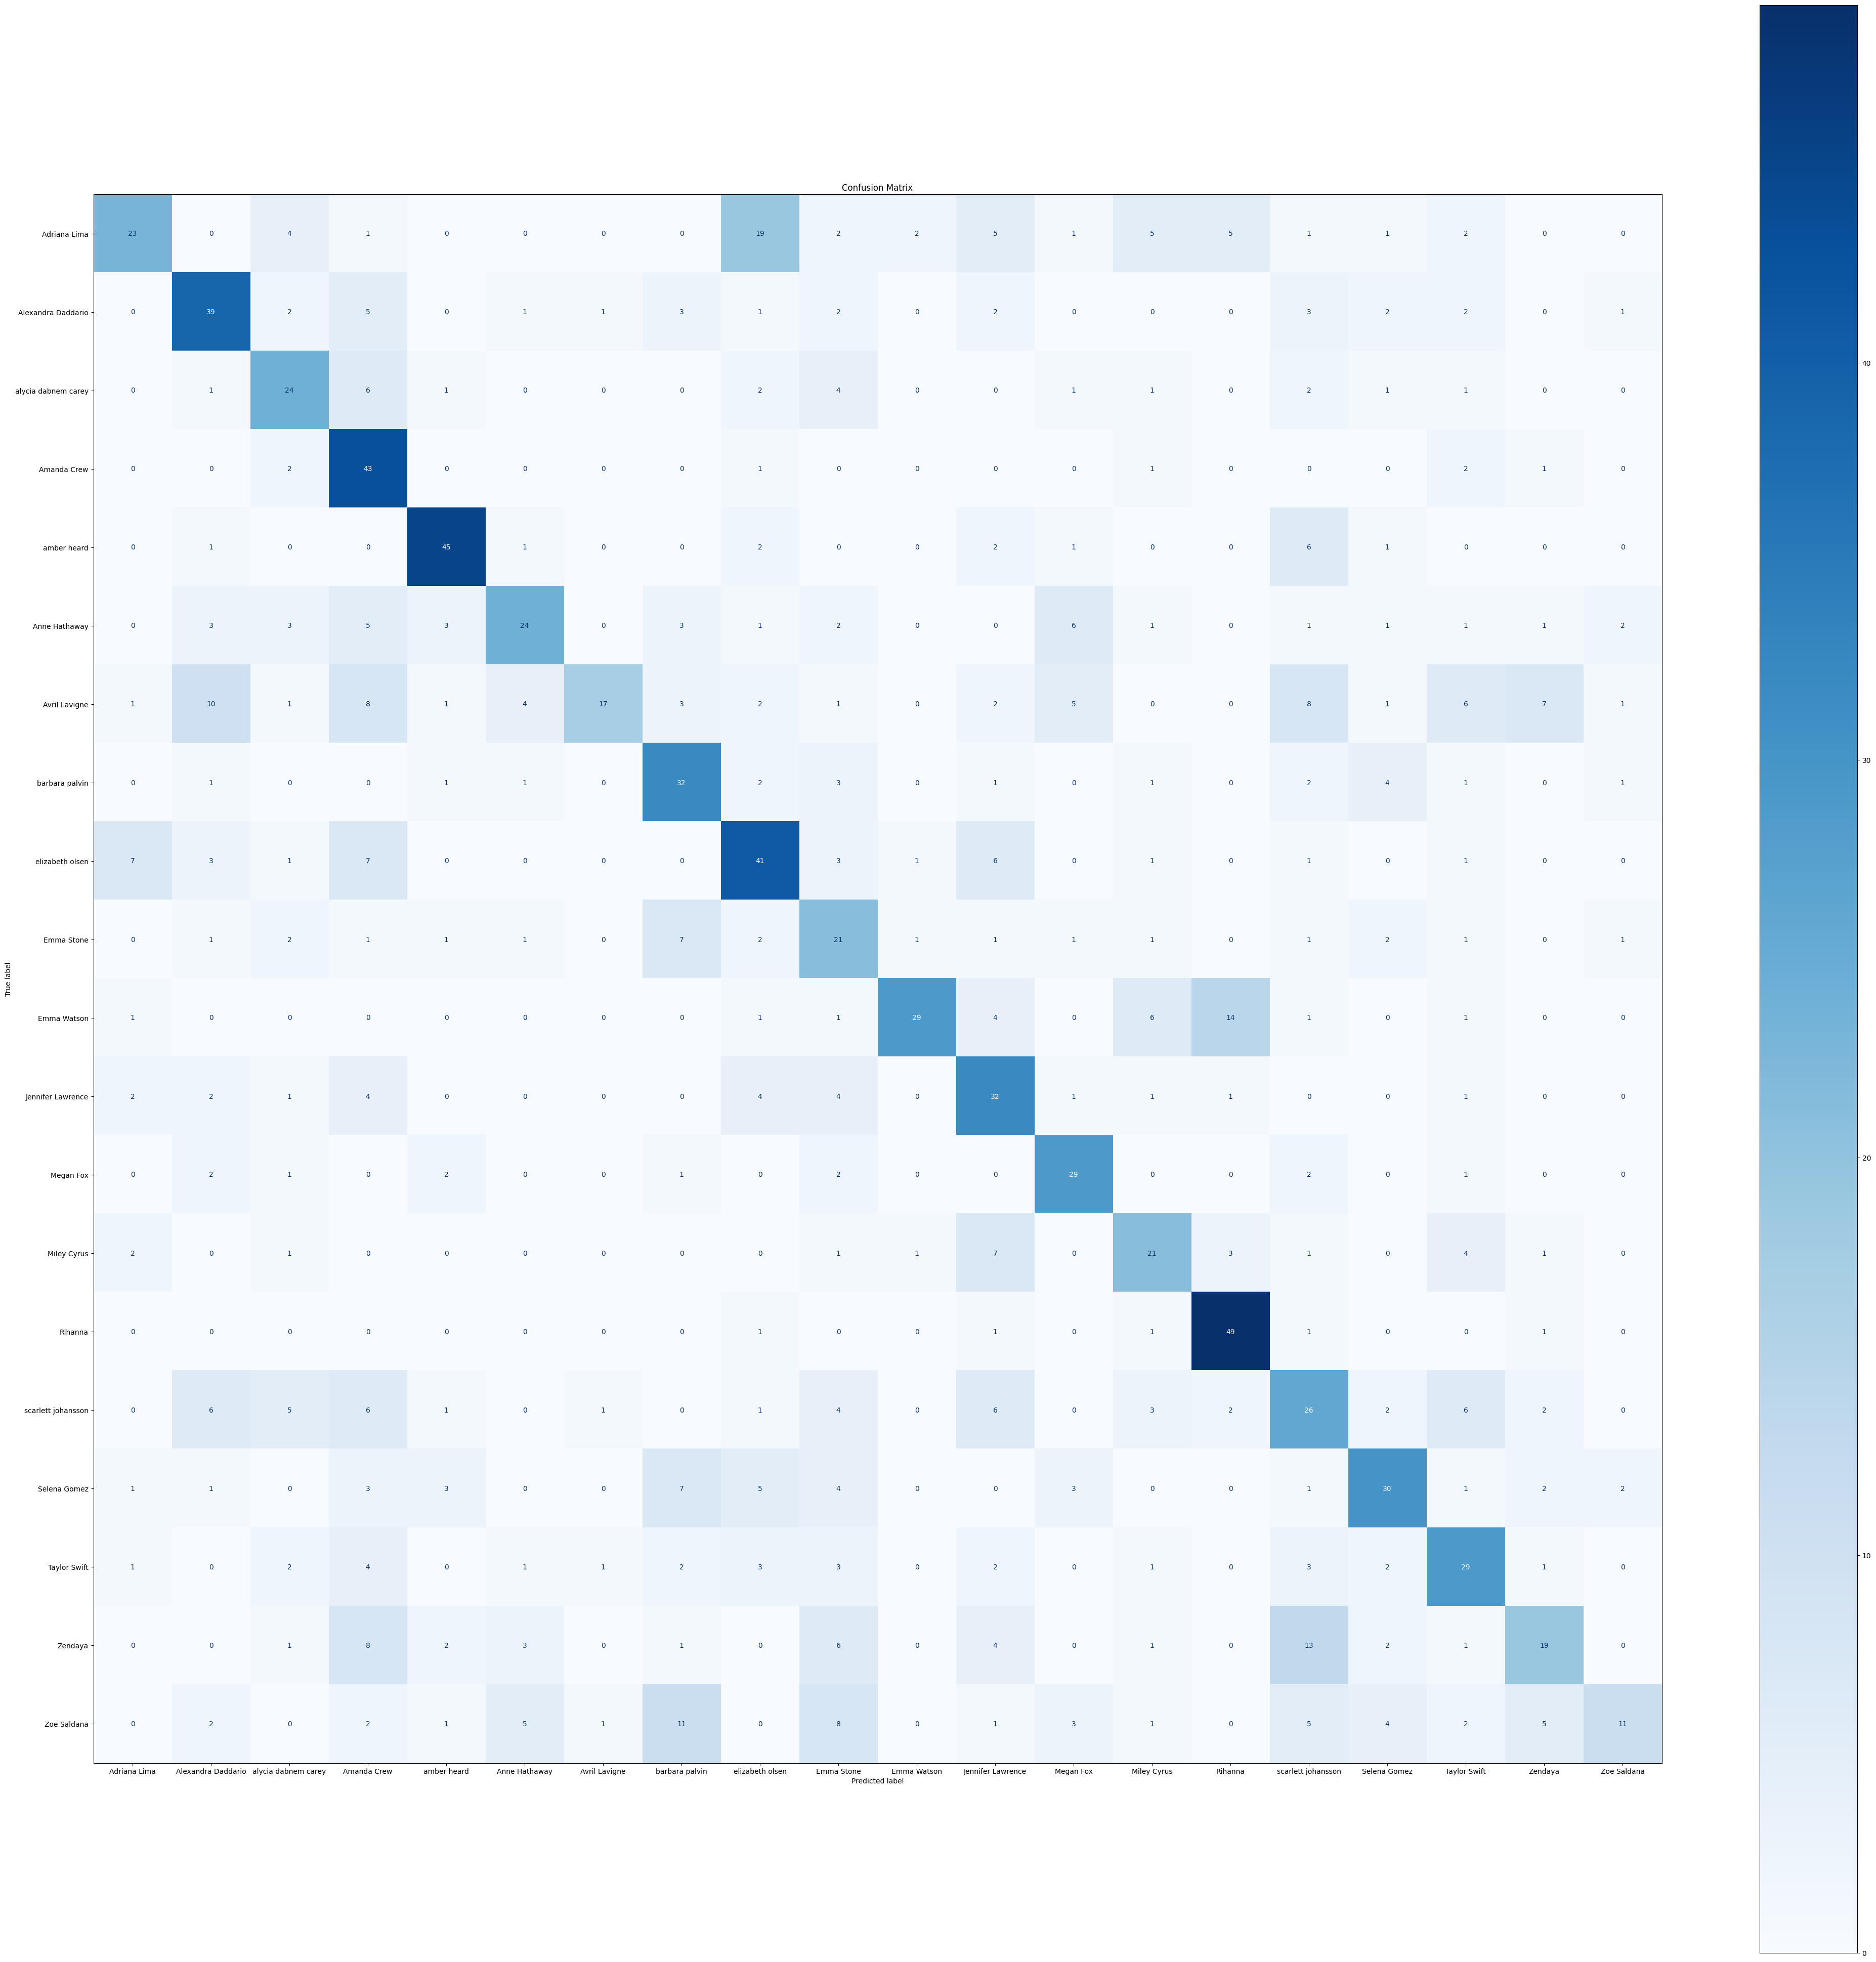

In [ ]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.cuda()
        labels = labels.cuda()
        outputs = female_model(inputs)
        tensor_output = outputs.logits  # Extracting the tensor from 'outputs'

        _, preds = torch.max(tensor_output, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
classes = ['Adriana Lima', 'Alexandra Daddario', 'alycia dabnem carey', 'Amanda Crew', 'amber heard',
           'Anne Hathaway', 'Avril Lavigne', 'barbara palvin', 'elizabeth olsen', 'Emma Stone', 'Emma Watson',
           'Jennifer Lawrence', 'Megan Fox', 'Miley Cyrus', 'Rihanna', 'scarlett johansson', 'Selena Gomez',
           'Taylor Swift', 'Zendaya', 'Zoe Saldana']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = classes)
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
fig = disp.figure_
fig.set_figwidth(25)
fig.set_figheight(25)
plt.xticks(rotation = 45,fontsize=20)
plt.yticks(fontsize=20)
plt.title("Confusion Matrix Female (20)",fontsize = 20)
plt.show()

### Hyperparameter tuning

#### **Redefine model**

In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

2024-04-24 18:48:53.427497: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 18:48:55.069553: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
#print(model)

In [ ]:
model.classifier = torch.nn.Sequential(torch.nn.Linear(768, 100), torch.nn.ReLU(), torch.nn.Linear(100, configs["num_classes"], torch.nn.Softmax()))  # The name of the layer is fc --> remove the original layer and add these to the layer
#model

In [ ]:
for param in model.parameters():
    param.requires_grad = False # Notes: It's not connected to the ? --> W1 = W0 + 倒三角 w E --> If 倒三角 w E = 0, the model won't be updated (下圖)

for param in model.classifier.parameters():
    param.requires_grad = True

#### Loss: Cross-Entropy

In [ ]:
criterion = nn.CrossEntropyLoss()

#### Optimizer: SGD

In [ ]:
optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=configs["learning_rate"], weight_decay=configs["weight_decay"])

#### Accuracy and Loss function

In [ ]:
## There is a package called torchmetrics that makes calculating accuracy easier.
## Feel free to use it. However, here, I show the logic behind such calculations
# !pip install -U torchmetrics
# import torchmetrics

def get_accuracy(dataloader, model):
  acc = 0

  with torch.no_grad():
      for images, labels in dataloader:
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          outputs = model(images) # get predictions

          # Update accuracy for this batch
          raw_logits = outputs.logits
          acc = acc + torch.sum(torch.argmax(raw_logits, axis=1) == labels)



      # Compute the accuracy
      acc = acc/len(dataloader.dataset) # normalizes


      return acc



In [ ]:
def get_loss(loader):
  with torch.no_grad(): # Anything under torch.no_grad will be calculated with no gradients. Can only be used for testing, not training!

    loss = 0
    for i, (images, labels) in enumerate(loader): # The batches.
          # step1: Move data to cuda. Make sure the model is on cuda too!
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          # step2: Forward pass
          outputs = model(images)


          # step 3: calculate the loss.
          raw_logits = outputs.logits
          loss = loss + criterion(raw_logits, labels)
    return loss/ len(loader)

#### Early-stopping class

In [ ]:
class EarlyStopper:
    def __init__(self, patience=1):
        self.patience = patience
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        # If the new loss is lower than the old loss, reset the counter!
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
            # Keep track of the best model by saving it on the hard drive.
            torch.save(model.state_dict(), "./best_model.pt")
        # otherwise, increment the counter.
        elif validation_loss > self.min_validation_loss:
            self.counter += 1
            # If there has been too many epochs with the loss being high, terminate.
            if self.counter >= self.patience:
                return True
        return False


#### Training

In [ ]:
if gpu_available and use_gpu:
  model = model.cuda()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbMetricsLogger
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Split the training data for validation

# Your Python code goes here...
# Step 1: Define your sweep configs here
sweep_configuration = {
    "method": "grid",
    "metric": {"goal": "minimize", "name": "val_loss"},
    "parameters": {"learning_rate": {'values':[1e-2, 1e-3, 1e-4]},
                   "epochs": {"values": [10, 20, 30]}},
    "early_terminate":{'type': 'hyperband',
                       'min_iter': 3}
}

def main():
    # initialize WandB
    run = wandb.init() #config=sweep_configuration
    lr = wandb.config.learning_rate
    ep = wandb.config.epochs

    early_stopper = EarlyStopper(patience=7)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=lr, weight_decay=0.00001)
    scheduler = ReduceLROnPlateau(optimizer, factor=0.3, patience=3)

    # Training loop
    for epoch in range(ep): # The epochs.
        for i, (images, labels) in enumerate(train_loader): # The batches.
            images = images.cuda()
            labels = labels.cuda()

            optimizer.zero_grad()
            outputs = model(images)
            raw_logits = outputs.logits
            loss = criterion(raw_logits, labels)
            loss.backward()
            optimizer.step()

            if i % 100 == 0:
                print("Epoch", epoch+1, " batch", i+1, ". Training Loss: ", loss.item())
                if enable_wandb:
                    wandb.log({"loss": loss})

        # Compute total train accuracy
        model.eval()
        train_acc = get_accuracy(train_loader, model)
        val_acc = get_accuracy(val_loader, model)

        validation_loss = get_loss(val_loader)
        wandb.log({"val_loss": validation_loss})

        print(f'Epoch [{epoch + 1}/{ep}], LR: {optimizer.param_groups[0]["lr"]}, Validation Loss: {validation_loss:.4f}, Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')
        if enable_wandb:
            wandb.log({"epoch": epoch + 1, "LR": optimizer.param_groups[0]['lr'], "train_accuracy": train_acc, "val_accuracy": val_acc})

        scheduler.step(validation_loss)

        if early_stopper.early_stop(validation_loss):
            print("Validation loss hasn't dropped. Early stopping!")
            break

# Step 3: Initialize sweep by passing in the config.
sweep_id = wandb.sweep(sweep=sweep_configuration, project="ViT-female-20tune")
# Step 4: Start sweep job.
wandb.agent(sweep_id, function=main)

Create sweep with ID: dj3phy1a
Sweep URL: https://wandb.ai/hnchan01/ViT-female-20tune/sweeps/dj3phy1a


wandb: Agent Starting Run: r9iemxpk with config:
wandb: 	epochs: 10
wandb: 	learning_rate: 0.01
wandb: Currently logged in as: hnchan (hnchan01). Use `wandb login --relogin` to force relogin


Epoch 1  batch 1 . Training Loss:  3.097297430038452
Epoch 1  batch 101 . Training Loss:  1.8872528076171875
Epoch [1/10], LR: 0.01, Validation Loss: 1.9564, Train Accuracy: 0.4447, Validation Accuracy: 0.3720
Epoch 2  batch 1 . Training Loss:  1.9548598527908325
Epoch 2  batch 101 . Training Loss:  1.5524228811264038
Epoch [2/10], LR: 0.01, Validation Loss: 1.7168, Train Accuracy: 0.5949, Validation Accuracy: 0.4582
Epoch 3  batch 1 . Training Loss:  1.2863852977752686
Epoch 3  batch 101 . Training Loss:  1.8502473831176758
Epoch [3/10], LR: 0.01, Validation Loss: 1.5447, Train Accuracy: 0.6831, Validation Accuracy: 0.5183
Epoch 4  batch 1 . Training Loss:  0.9202927350997925
Epoch 4  batch 101 . Training Loss:  1.445962905883789
Epoch [4/10], LR: 0.01, Validation Loss: 1.5019, Train Accuracy: 0.7389, Validation Accuracy: 0.5392
Epoch 5  batch 1 . Training Loss:  0.9366306066513062
Epoch 5  batch 101 . Training Loss:  0.6696820855140686
Epoch [5/10], LR: 0.01, Validation Loss: 1.4345,

LR,█████████▁
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▅▄▄▅▃▄▃▂▂▂▂▂▂▁▁▁▁▁
train_accuracy,▁▃▄▅▆▆▇▇██
val_accuracy,▁▃▅▅▆▇▇▇██
val_loss,█▅▃▂▁▁▂▂▂▁
LR,0.003
epoch,10
loss,0.24688
train_accuracy,0.96698
val_accuracy,0.6385


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xz349szo with config:
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Epoch 1  batch 1 . Training Loss:  0.3955351710319519
Epoch 1  batch 101 . Training Loss:  0.15669819712638855
Epoch [1/10], LR: 0.001, Validation Loss: 1.3913, Train Accuracy: 0.9789, Validation Accuracy: 0.6516
Epoch 2  batch 1 . Training Loss:  0.10546647012233734
Epoch 2  batch 101 . Training Loss:  0.09584207832813263
Epoch [2/10], LR: 0.001, Validation Loss: 1.3991, Train Accuracy: 0.9812, Validation Accuracy: 0.6524
Epoch 3  batch 1 . Training Loss:  0.06816739588975906
Epoch 3  batch 101 . Training Loss:  0.08346438407897949
Epoch [3/10], LR: 0.001, Validation Loss: 1.4080, Train Accuracy: 0.9832, Validation Accuracy: 0.6524
Epoch 4  batch 1 . Training Loss:  0.13431501388549805
Epoch 4  batch 101 . Training Loss:  0.11315711587667465
Epoch [4/10], LR: 0.001, Validation Loss: 1.4134, Train Accuracy: 0.9819, Validation Accuracy: 0.6490
Epoch 5  batch 1 . Training Loss:  0.12578453123569489
Epoch 5  batch 101 . Training Loss:  0.08495373278856277
Epoch [5/10], LR: 0.001, Validati

LR,█████▁▁▁
epoch,▁▂▃▄▅▆▇█
loss,█▃▂▂▁▁▃▂▂▁▂▁▁▁▁▁
train_accuracy,▁▃▄▃▇▇▇█
val_accuracy,▃▄▄▁▄█▄█
val_loss,▁▃▅▆█▇▇█
LR,0.0003
epoch,8
loss,0.07679
train_accuracy,0.98825
val_accuracy,0.65679


wandb: Agent Starting Run: i9z8vqzi with config:
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001


Epoch 1  batch 1 . Training Loss:  0.0847267135977745
Epoch 1  batch 101 . Training Loss:  0.09063956141471863
Epoch [1/10], LR: 0.0001, Validation Loss: 1.4222, Train Accuracy: 0.9879, Validation Accuracy: 0.6524
Epoch 2  batch 1 . Training Loss:  0.3154512941837311
Epoch 2  batch 101 . Training Loss:  0.1541757583618164
Epoch [2/10], LR: 0.0001, Validation Loss: 1.4230, Train Accuracy: 0.9884, Validation Accuracy: 0.6559
Epoch 3  batch 1 . Training Loss:  0.09352625906467438
Epoch 3  batch 101 . Training Loss:  0.09189033508300781
Epoch [3/10], LR: 0.0001, Validation Loss: 1.4236, Train Accuracy: 0.9884, Validation Accuracy: 0.6551
Epoch 4  batch 1 . Training Loss:  0.08733745664358139
Epoch 4  batch 101 . Training Loss:  0.23309043049812317
Epoch [4/10], LR: 0.0001, Validation Loss: 1.4239, Train Accuracy: 0.9884, Validation Accuracy: 0.6559
Epoch 5  batch 1 . Training Loss:  0.1280745267868042
Epoch 5  batch 101 . Training Loss:  0.10174990445375443
Epoch [5/10], LR: 0.0001, Valida

LR,█████▁▁▁
epoch,▁▂▃▄▅▆▇█
loss,▁▁█▃▂▁▁▆▃▂▁▅▁▁▂▂
train_accuracy,▁▆▆▆▅▆▆█
val_accuracy,▁▇▅▇█▅▄▅
val_loss,▁▃▅▅▇▇▇█
LR,3e-05
epoch,8
loss,0.10874
train_accuracy,0.98862
val_accuracy,0.65505


wandb: Agent Starting Run: bq6i43ln with config:
wandb: 	epochs: 20
wandb: 	learning_rate: 0.01


Epoch 1  batch 1 . Training Loss:  0.07221172749996185
Epoch 1  batch 101 . Training Loss:  0.31268036365509033
Epoch [1/20], LR: 0.01, Validation Loss: 1.6650, Train Accuracy: 0.9267, Validation Accuracy: 0.5984
Epoch 2  batch 1 . Training Loss:  0.12962329387664795
Epoch 2  batch 101 . Training Loss:  0.2853078842163086
Epoch [2/20], LR: 0.01, Validation Loss: 1.6987, Train Accuracy: 0.9427, Validation Accuracy: 0.6063
Epoch 3  batch 1 . Training Loss:  0.1652953028678894
Epoch 3  batch 101 . Training Loss:  0.17636771500110626
Epoch [3/20], LR: 0.01, Validation Loss: 1.7096, Train Accuracy: 0.9664, Validation Accuracy: 0.6089
Epoch 4  batch 1 . Training Loss:  0.19955122470855713


LR,▁▁▁
epoch,▁▅█
loss,▁█▃▇▄▄▅
train_accuracy,▁▄█
val_accuracy,▁▆█
val_loss,▁▆█
LR,0.01
epoch,3
loss,0.19955
train_accuracy,0.96642
val_accuracy,0.60889


wandb: Agent Starting Run: k1zej63v with config:
wandb: 	epochs: 20
wandb: 	learning_rate: 0.001


Epoch 1  batch 1 . Training Loss:  0.15259642899036407
Epoch 1  batch 101 . Training Loss:  0.0553780123591423
Epoch [1/20], LR: 0.001, Validation Loss: 1.6247, Train Accuracy: 0.9946, Validation Accuracy: 0.6394
Epoch 2  batch 1 . Training Loss:  0.07116745412349701
Epoch 2  batch 101 . Training Loss:  0.09676662087440491
Epoch [2/20], LR: 0.001, Validation Loss: 1.6191, Train Accuracy: 0.9965, Validation Accuracy: 0.6446
Epoch 3  batch 1 . Training Loss:  0.044932253658771515
Epoch 3  batch 101 . Training Loss:  0.048115190118551254
Epoch [3/20], LR: 0.001, Validation Loss: 1.6175, Train Accuracy: 0.9968, Validation Accuracy: 0.6463
Epoch 4  batch 1 . Training Loss:  0.06721347570419312
Epoch 4  batch 101 . Training Loss:  0.03509606420993805


LR,▁▁▁
epoch,▁▅█
loss,█▂▃▅▂▂▃▁
train_accuracy,▁▇█
val_accuracy,▁▆█
val_loss,█▃▁
LR,0.001
epoch,3
loss,0.0351
train_accuracy,0.99683
val_accuracy,0.64634


wandb: Agent Starting Run: ajf5w3my with config:
wandb: 	epochs: 20
wandb: 	learning_rate: 0.0001


Epoch 1  batch 1 . Training Loss:  0.049736056476831436
Epoch 1  batch 101 . Training Loss:  0.04730842262506485
Epoch [1/20], LR: 0.0001, Validation Loss: 1.6239, Train Accuracy: 0.9970, Validation Accuracy: 0.6455
Epoch 2  batch 1 . Training Loss:  0.032390303909778595
Epoch 2  batch 101 . Training Loss:  0.09257645905017853
Epoch [2/20], LR: 0.0001, Validation Loss: 1.6229, Train Accuracy: 0.9970, Validation Accuracy: 0.6481
Epoch 3  batch 1 . Training Loss:  0.023700464516878128
Epoch 3  batch 101 . Training Loss:  0.04837943986058235
Epoch [3/20], LR: 0.0001, Validation Loss: 1.6224, Train Accuracy: 0.9972, Validation Accuracy: 0.6481
Epoch 4  batch 1 . Training Loss:  0.053910624235868454


LR,▁▁▁
epoch,▁▅█
loss,▄▃▂█▁▄▄
train_accuracy,▁▁█
val_accuracy,▁██
val_loss,█▃▁
LR,0.0001
epoch,3
loss,0.05391
train_accuracy,0.9972
val_accuracy,0.64808


wandb: Agent Starting Run: ki7bw6zk with config:
wandb: 	epochs: 30
wandb: 	learning_rate: 0.01


Epoch 1  batch 1 . Training Loss:  0.05774494260549545
Epoch 1  batch 101 . Training Loss:  0.051689572632312775
Epoch [1/30], LR: 0.01, Validation Loss: 1.7964, Train Accuracy: 0.9649, Validation Accuracy: 0.6150
Epoch 2  batch 1 . Training Loss:  0.1048557236790657
Epoch 2  batch 101 . Training Loss:  0.15763762593269348
Epoch [2/30], LR: 0.01, Validation Loss: 1.7424, Train Accuracy: 0.9910, Validation Accuracy: 0.6272
Epoch 3  batch 1 . Training Loss:  0.031243856996297836
Epoch 3  batch 101 . Training Loss:  0.05537213385105133
Epoch [3/30], LR: 0.01, Validation Loss: 1.7772, Train Accuracy: 0.9944, Validation Accuracy: 0.6289
Epoch 4  batch 1 . Training Loss:  0.07827933132648468


LR,▁▁▁
epoch,▁▅█
loss,▂▂▅█▁▂▄
train_accuracy,▁▇█
val_accuracy,▁▇█
val_loss,█▁▆
LR,0.01
epoch,3
loss,0.07828
train_accuracy,0.9944
val_accuracy,0.62892


wandb: Agent Starting Run: cdjo5pob with config:
wandb: 	epochs: 30
wandb: 	learning_rate: 0.001


Epoch 1  batch 1 . Training Loss:  0.047210387885570526
Epoch 1  batch 101 . Training Loss:  0.02334909699857235
Epoch [1/30], LR: 0.001, Validation Loss: 1.7352, Train Accuracy: 0.9998, Validation Accuracy: 0.6516
Epoch 2  batch 1 . Training Loss:  0.021589886397123337
Epoch 2  batch 101 . Training Loss:  0.049157120287418365
Epoch [2/30], LR: 0.001, Validation Loss: 1.7365, Train Accuracy: 0.9998, Validation Accuracy: 0.6524
Epoch 3  batch 1 . Training Loss:  0.01680506020784378
Epoch 3  batch 101 . Training Loss:  0.021896472200751305
Epoch [3/30], LR: 0.001, Validation Loss: 1.7380, Train Accuracy: 0.9998, Validation Accuracy: 0.6507
Epoch 4  batch 1 . Training Loss:  0.021707836538553238
Epoch 4  batch 101 . Training Loss:  0.024032743647694588


LR,▁▁▁
epoch,▁▅█
loss,█▂▂█▁▂▂▃
train_accuracy,▁▁▁
val_accuracy,▄█▁
val_loss,▁▄█
LR,0.001
epoch,3
loss,0.02403
train_accuracy,0.99981
val_accuracy,0.6507


wandb: Agent Starting Run: e0lnglxm with config:
wandb: 	epochs: 30
wandb: 	learning_rate: 0.0001


Epoch 1  batch 1 . Training Loss:  0.016221465542912483
Epoch 1  batch 101 . Training Loss:  0.02709859423339367
Epoch [1/30], LR: 0.0001, Validation Loss: 1.7365, Train Accuracy: 0.9998, Validation Accuracy: 0.6524
Epoch 2  batch 1 . Training Loss:  0.025174664333462715
Epoch 2  batch 101 . Training Loss:  0.010079280473291874
Epoch [2/30], LR: 0.0001, Validation Loss: 1.7367, Train Accuracy: 0.9998, Validation Accuracy: 0.6533
Epoch 3  batch 1 . Training Loss:  0.011582175269722939
Epoch 3  batch 101 . Training Loss:  0.02170744724571705
Epoch [3/30], LR: 0.0001, Validation Loss: 1.7370, Train Accuracy: 0.9998, Validation Accuracy: 0.6533
Epoch 4  batch 1 . Training Loss:  0.023275256156921387


LR,▁▁▁
epoch,▁▅█
loss,▄█▇▁▂▆▆
train_accuracy,▁▁▁
val_accuracy,▁██
val_loss,▁▃█
LR,0.0001
epoch,3
loss,0.02328
train_accuracy,0.99981
val_accuracy,0.65331


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


#### Test

In [ ]:
print("last model performance on Test set:", get_accuracy(test_loader, model))

# Once training is done, load the best model (might not be the last model due to early stopping)
model.load_state_dict(torch.load("./best_model.pt"))
acc = get_accuracy(test_loader, model)
print("best model performance Test set:", acc)

if enable_wandb:
    wandb.init()
    wandb.summary['Test Accuracy'] = acc.item()

last model performance on Test set: tensor(0.6301, device='cuda:0')
best model performance Test set: tensor(0.6301, device='cuda:0')


In [ ]:
if enable_wandb:
  wandb.finish()

## Male - Model

In [ ]:
configs = {
    "project_name": "ViT-20-Final",
    "experiment_name": "ViT-20-male-final",
    "freeze_feature_extraction_layers": True,
    "pretrained":True,
    "efficientnet":False,
    "data_augmentation":False,
    "transferlearning": True,

    # Data
    "img_dimensions" : (3,224,224),
    "batch_size" : 32,
    "num_classes" : 20,

    # CNN
    "filter_sizes" : [4,8],
    "kernel_size" : 3,
    "stride": 2,
    "padding":1,

    #Optimzation
    "learning_rate" : 0.001,
    "epochs" : 10,
    "weight_decay" : 0.00001
}

In [ ]:
main_directory = 'male'

In [ ]:
# Transformations
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
if configs["data_augmentation"]:
  transform = transforms.Compose([
      transforms.RandomHorizontalFlip(0.5), # 50% of the person will flip
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.RandomCrop(224),
      transforms.RandomRotation(45), # Random rotate
      transforms.ColorJitter(),
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])
else:
  transform = transforms.Compose([
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.CenterCrop(224),
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])


import torchvision
whole_dataset = torchvision.datasets.ImageFolder(main_directory, transform=transform)
train_dataset, val_dataset = random_split(whole_dataset, [0.7, 0.3])
test_dataset, val_dataset = random_split(val_dataset, [0.5, 0.5])

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=configs["batch_size"], shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=configs["batch_size"], shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=configs["batch_size"], shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


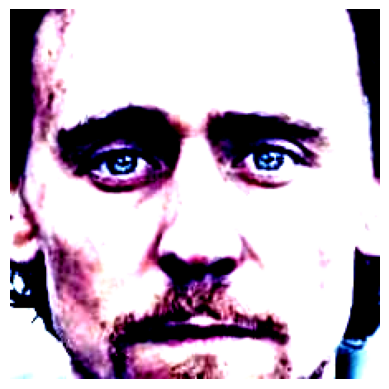

In [ ]:
image_tensor = train_dataset[3][0]

image_np = np.transpose(image_tensor.numpy(), (1, 2, 0))

# Display the image
plt.imshow(image_np)
plt.axis('off')
plt.show()

### **Data Preparation**

In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

In [ ]:
#print(model)

In [ ]:
model.classifier = torch.nn.Sequential(torch.nn.Linear(768, 100), torch.nn.ReLU(), torch.nn.Linear(100, configs["num_classes"], torch.nn.Softmax()))  # The name of the layer is fc --> remove the original layer and add these to the layer
#model

In [ ]:
for param in model.parameters():
    param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True

### Loss: Cross-Entropy

In [ ]:
criterion = nn.CrossEntropyLoss()

### Optimizer: SGD

In [ ]:
optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=configs["learning_rate"], weight_decay=configs["weight_decay"])

### Accuracy and Loss function

In [ ]:
if enable_wandb:
  wandb.init(
    # Set the project where this run will be logged
    project=configs["project_name"],
    # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
    name=configs["experiment_name"],
    # Track hyperparameters and run metadata
    config=configs)

In [ ]:
def get_accuracy(dataloader, model):
  acc = 0
  # <OR>
  # acc = torchmetrics.Accuracy()

  with torch.no_grad():
      for images, labels in dataloader:
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          outputs = model(images) # get predictions

          # Update accuracy for this batch
          raw_logits = outputs.logits
          acc = acc + torch.sum(torch.argmax(raw_logits, axis=1) == labels)
          # <OR>
          # acc.update(outputs, labels)


      # Compute the accuracy
      acc = acc/len(dataloader.dataset) # normalizes
      # <OR>
      # acc = acc.compute()

      return acc



In [ ]:
def get_loss(loader):
  with torch.no_grad(): # Anything under torch.no_grad will be calculated with no gradients. Can only be used for testing, not training!

    loss = 0
    for i, (images, labels) in enumerate(loader): # The batches.
          # step1: Move data to cuda. Make sure the model is on cuda too!
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          # step2: Forward pass
          outputs = model(images)


          # step 3: calculate the loss.
          raw_logits = outputs.logits
          loss = loss + criterion(raw_logits, labels)
    return loss/ len(loader)

### Early-stopping class

In [ ]:
class EarlyStopper:
    def __init__(self, patience=1):
        self.patience = patience
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        # If the new loss is lower than the old loss, reset the counter!
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
            # Keep track of the best model by saving it on the hard drive.
            torch.save(model.state_dict(), "./best_model.pt")
        # otherwise, increment the counter.
        elif validation_loss > self.min_validation_loss:
            self.counter += 1
            # If there has been too many epochs with the loss being high, terminate.
            if self.counter >= self.patience:
                return True
        return False


### Training

In [ ]:
if gpu_available and use_gpu:
  model = model.cuda()

In [ ]:
early_stopper = EarlyStopper(patience=7)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.3, patience=3)

# Training loop
for epoch in range(configs["epochs"]): # The epochs.
    for i, (images, labels) in enumerate(train_loader): # The batches.
        # step 1: Zero out the gradients.
        optimizer.zero_grad()

        # step 1.1 move data to cuda. Make sure the model is on cuda too!
        if gpu_available and use_gpu:
          images = images.cuda()
          labels = labels.cuda()

        # step2: Forward pass
        outputs = model(images)

        # step 3: calculate the loss.
        raw_logits = outputs.logits
        loss = criterion(raw_logits, labels)

        # step 4: Backward pass
        loss.backward()
        optimizer.step()

        # Print the loss
        if i %100 == 0:
          print("Epoch", epoch+ 1, " batch", i+1, ". Training Loss: ", loss.item())
          if enable_wandb:
            wandb.log({"loss": loss})

    # Compute total train accuracy
    train_acc = get_accuracy(train_loader, model)
    test_acc = get_accuracy(val_loader, model)

    validation_loss = get_loss(val_loader)
    wandb.log({"val_loss": validation_loss})

    print(f'Epoch [{epoch + 1}/{configs["epochs"]}], LR: {optimizer.param_groups[0]["lr"]}, Validation Loss: {validation_loss.item():.4f}, Train Accuracy: {train_acc.item():.4f}, Validation Accuracy: {test_acc.item():.4f}')
    if enable_wandb:
      wandb.log({"epoch": epoch + 1, "LR": {optimizer.param_groups[0]['lr']}, "train_accuracy": train_acc.item(), "val_accuracy": test_acc.item()})

    scheduler.step(validation_loss)

    if early_stopper.early_stop(validation_loss):
        print("Validation loss hasn't dropped. Early stopping!")
        break



Epoch 1  batch 1 . Training Loss:  2.9934847354888916
Epoch 1  batch 101 . Training Loss:  2.790503978729248
Epoch [1/10], LR: 0.001, Validation Loss: 2.6109, Train Accuracy: 0.3465, Validation Accuracy: 0.3085
Epoch 2  batch 1 . Training Loss:  2.5981030464172363
Epoch 2  batch 101 . Training Loss:  2.3339786529541016
Epoch [2/10], LR: 0.001, Validation Loss: 2.1468, Train Accuracy: 0.4535, Validation Accuracy: 0.4116
Epoch 3  batch 1 . Training Loss:  2.11496901512146
Epoch 3  batch 101 . Training Loss:  1.8846166133880615
Epoch [3/10], LR: 0.001, Validation Loss: 1.8439, Train Accuracy: 0.5436, Validation Accuracy: 0.4945
Epoch 4  batch 1 . Training Loss:  1.8312658071517944
Epoch 4  batch 101 . Training Loss:  1.72952139377594
Epoch [4/10], LR: 0.001, Validation Loss: 1.6556, Train Accuracy: 0.5911, Validation Accuracy: 0.5497
Epoch 5  batch 1 . Training Loss:  1.806218147277832
Epoch 5  batch 101 . Training Loss:  1.501383900642395
Epoch [5/10], LR: 0.001, Validation Loss: 1.5167,

### Test

In [ ]:
print("last model performance on Test set:", get_accuracy(test_loader, model))

# Once training is done, load the best model (might not be the last model due to early stopping)
model.load_state_dict(torch.load("./best_model.pt"))
acc = get_accuracy(test_loader, model)
print("best model performance Test set:", acc)

if enable_wandb:
  wandb.summary['Test Accuracy'] = acc.item()

last model performance on Test set: tensor(0.6225, device='cuda:0')
best model performance Test set: tensor(0.6225, device='cuda:0')


In [ ]:
if enable_wandb:
  wandb.finish()

epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▇▆▅▄▄▃▄▃▂▁▂▂▂▁▂▁▁▂
train_accuracy,▁▃▄▅▆▇▇▇██
val_accuracy,▁▃▅▆▇▇▇▇██
val_loss,█▆▄▃▃▂▂▂▁▁
Test Accuracy,0.62247
epoch,10
loss,1.44261
train_accuracy,0.74556
val_accuracy,0.65193
val_loss,1.18258


The training accuracy and test accuracy of the male classes is about 74% and 62% respectively.

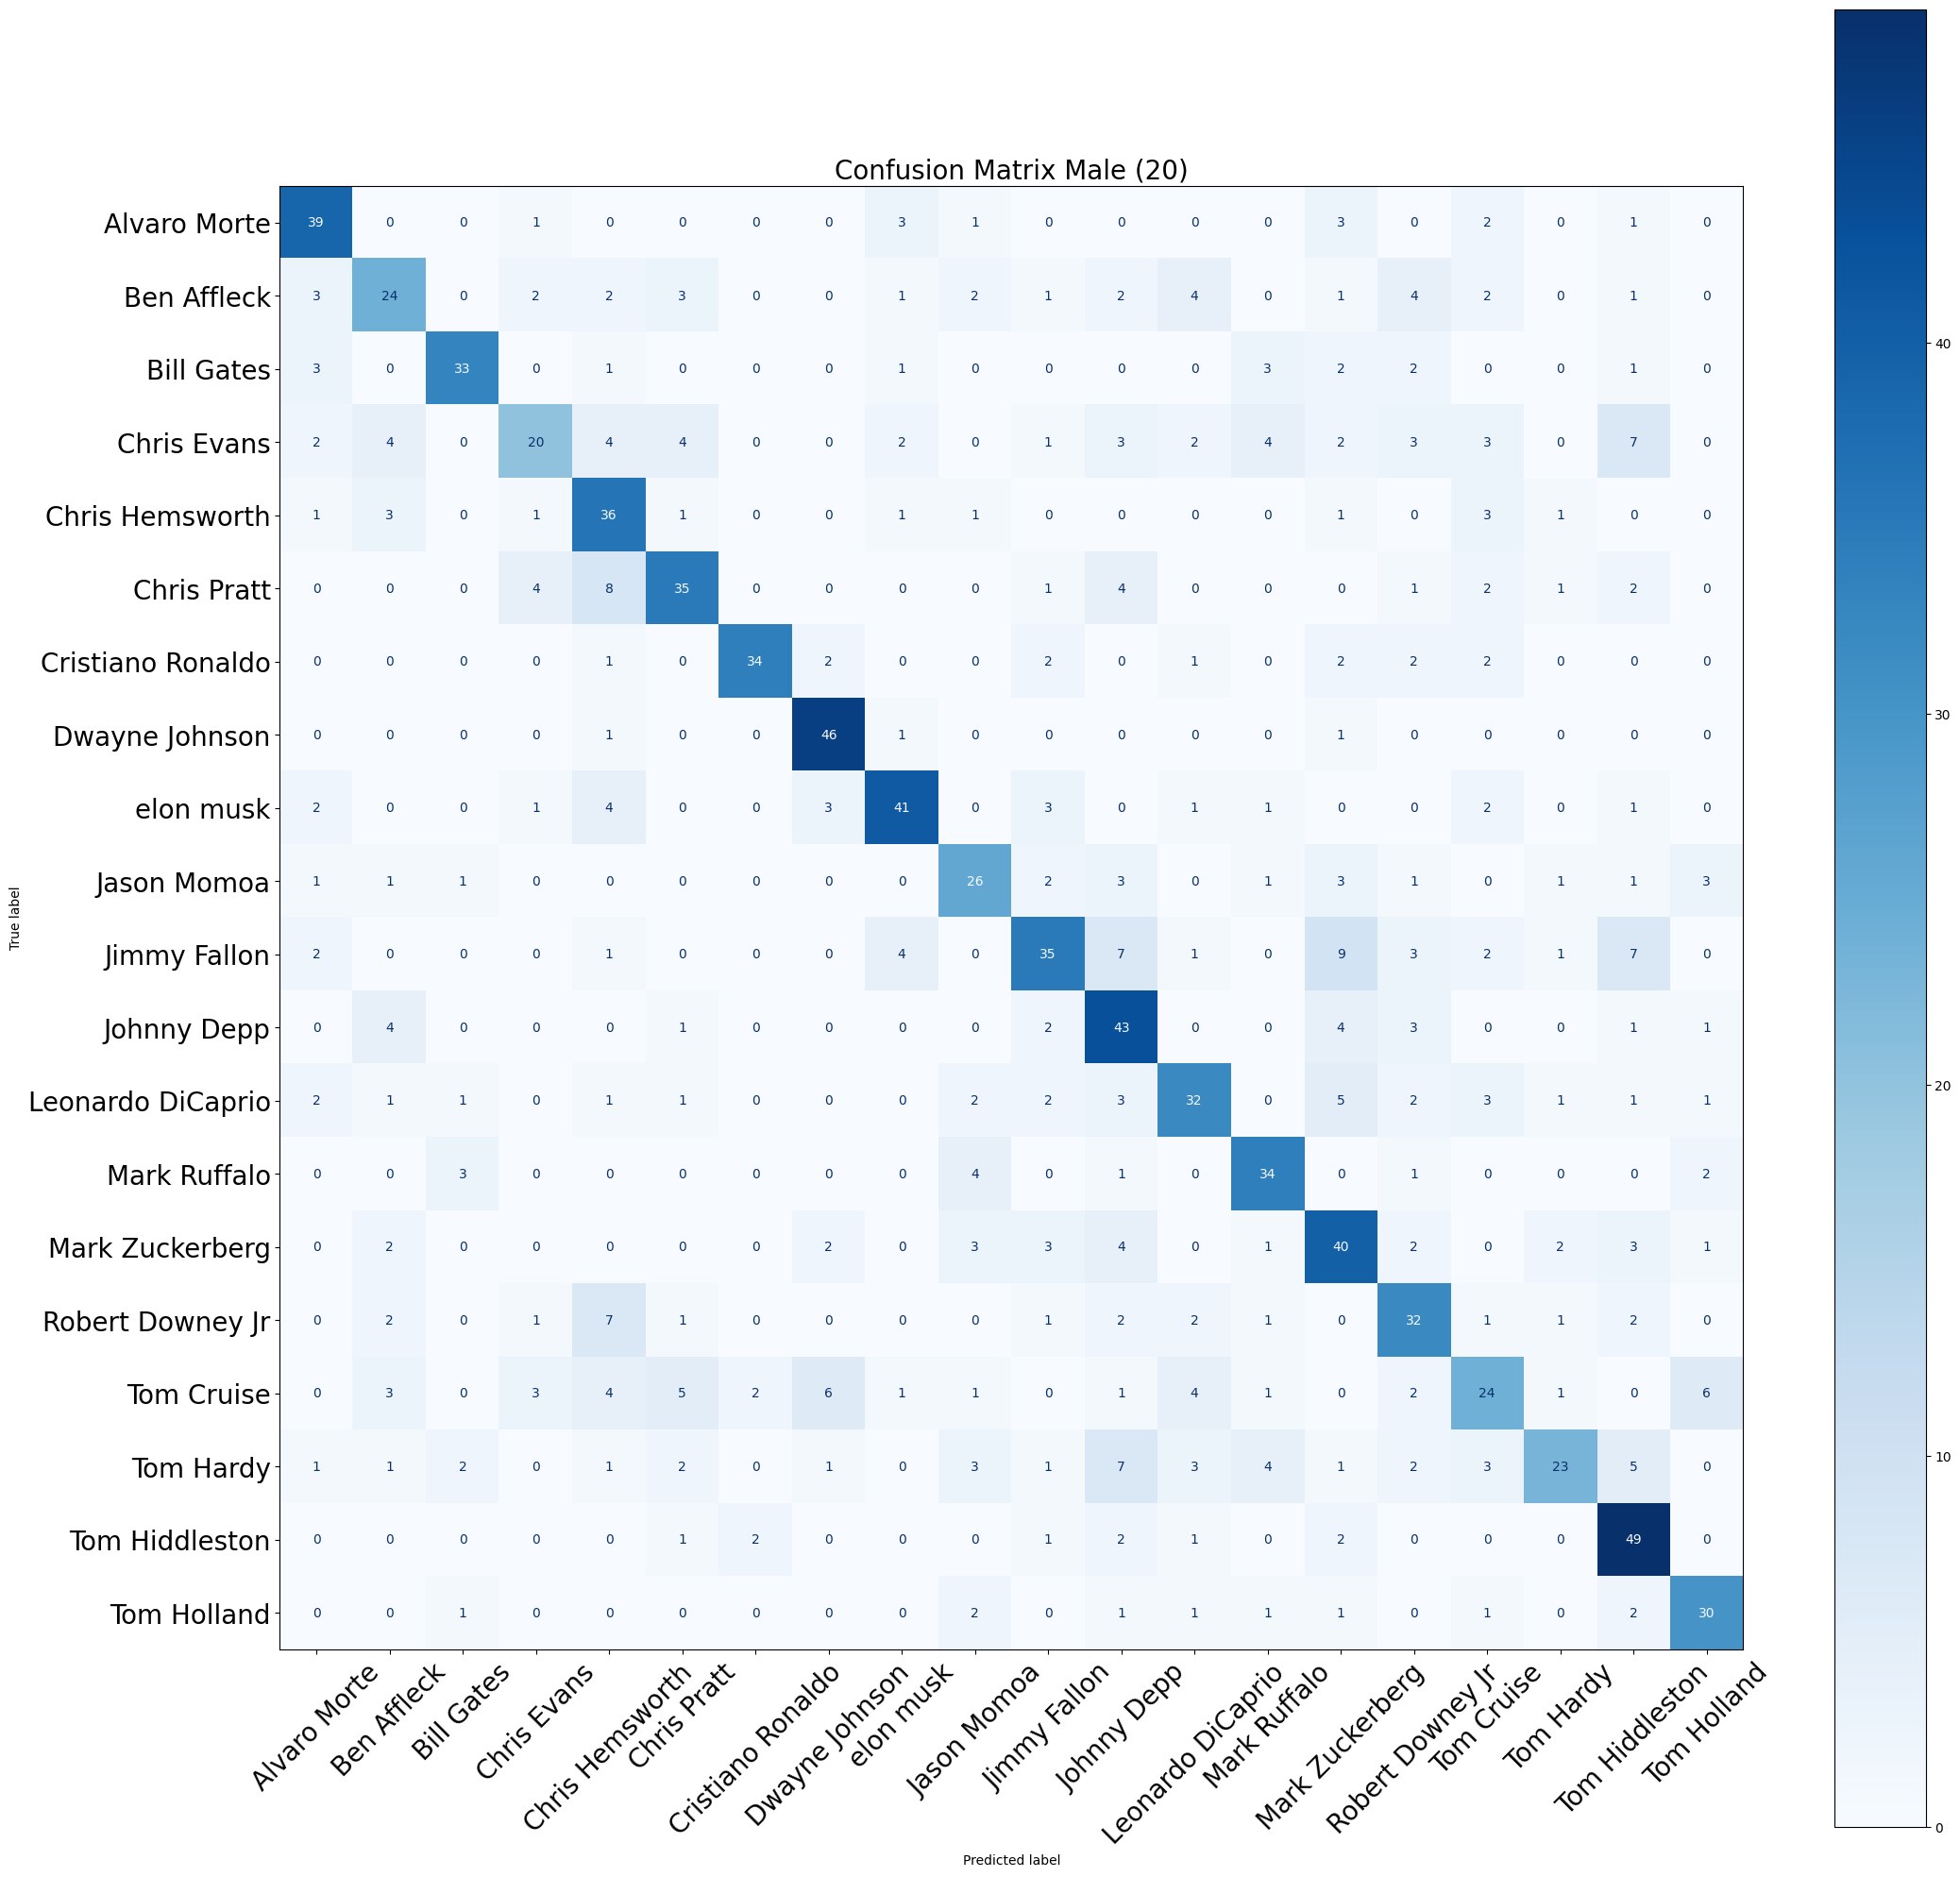

In [ ]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()  # Set the model to evaluation mode

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.cuda()
        labels = labels.cuda()
        outputs = model(inputs)
        tensor_output = outputs.logits  # Extracting the tensor from 'outputs'

        _, preds = torch.max(tensor_output, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
classes = ['Alvaro Morte', 'Ben Affleck', 'Bill Gates', 'Chris Evans', 'Chris Hemsworth', 'Chris Pratt',
           'Cristiano Ronaldo', 'Dwayne Johnson', 'elon musk', 'Jason Momoa', 'Jimmy Fallon', 'Johnny Depp',
           'Leonardo DiCaprio', 'Mark Ruffalo', 'Mark Zuckerberg', 'Robert Downey Jr', 'Tom Cruise', 'Tom Hardy',
           'Tom Hiddleston', 'Tom Holland']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = classes)
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
fig = disp.figure_
fig.set_figwidth(25)
fig.set_figheight(25)
plt.xticks(rotation = 45, fontsize=20)
plt.yticks(fontsize=20)
plt.title("Confusion Matrix Male (20)",fontsize = 20)
plt.show()

### Hyperparameter tuning

In [ ]:
configs = {
    "project_name": "ViT-20-Final",
    "experiment_name": "ViT-20-male-final",
    "freeze_feature_extraction_layers": True,
    "pretrained":True,
    "efficientnet":False,
    "data_augmentation":False,
    "transferlearning": True,

    # Data
    "img_dimensions" : (3,224,224),
    "batch_size" : 32,
    "num_classes" : 20,

    # CNN
    "filter_sizes" : [4,8],
    "kernel_size" : 3,
    "stride": 2,
    "padding":1,

    #Optimzation
    "learning_rate" : 0.001,
    "epochs" : 10,
    "weight_decay" : 0.00001
}

In [ ]:
main_directory = 'male'

In [ ]:
# Transformations
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
if configs["data_augmentation"]:
  transform = transforms.Compose([
      transforms.RandomHorizontalFlip(0.5), # 50% of the person will flip
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.RandomCrop(224),
      transforms.RandomRotation(45), # Random rotate
      transforms.ColorJitter(),
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])
else:
  transform = transforms.Compose([
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.CenterCrop(224),
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])


import torchvision
whole_dataset = torchvision.datasets.ImageFolder(main_directory, transform=transform)
train_dataset, val_dataset = random_split(whole_dataset, [0.7, 0.3])
test_dataset, val_dataset = random_split(val_dataset, [0.5, 0.5])

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=configs["batch_size"], shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=configs["batch_size"], shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=configs["batch_size"], shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


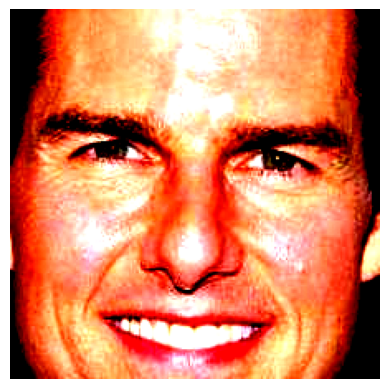

In [ ]:
image_tensor = train_dataset[3][0]

# Convert the image tensor to a NumPy array and rearrange the dimensions
# Assuming the tensor is in (C, H, W) format (channels, height, width)
image_np = np.transpose(image_tensor.numpy(), (1, 2, 0))

# Display the image
plt.imshow(image_np)
plt.axis('off')
plt.show()

#### **Redefine Model**

In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

2024-04-25 11:40:35.180810: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-25 11:40:35.227966: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 11:40:37.077075: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
#print(model)

In [ ]:
model.classifier = torch.nn.Sequential(torch.nn.Linear(768, 100), torch.nn.ReLU(), torch.nn.Linear(100, configs["num_classes"], torch.nn.Softmax()))  # The name of the layer is fc --> remove the original layer and add these to the layer
#model

In [ ]:
for param in model.parameters():
    param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True

#### Loss: Cross-Entropy

In [ ]:
criterion = nn.CrossEntropyLoss()

#### Optimizer: SGD

In [ ]:
optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=configs["learning_rate"], weight_decay=configs["weight_decay"])

#### Accuracy and Loss function

In [ ]:
def get_accuracy(dataloader, model):
  acc = 0


  with torch.no_grad():
      for images, labels in dataloader:
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          outputs = model(images) # get predictions

          # Update accuracy for this batch
          raw_logits = outputs.logits
          acc = acc + torch.sum(torch.argmax(raw_logits, axis=1) == labels)



      # Compute the accuracy
      acc = acc/len(dataloader.dataset) # normalizes


      return acc



In [ ]:
def get_loss(loader):
  with torch.no_grad(): # Anything under torch.no_grad will be calculated with no gradients. Can only be used for testing, not training!

    loss = 0
    for i, (images, labels) in enumerate(loader): # The batches.
          # step1: Move data to cuda. Make sure the model is on cuda too!
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          # step2: Forward pass
          outputs = model(images)


          # step 3: calculate the loss.
          raw_logits = outputs.logits
          loss = loss + criterion(raw_logits, labels)
    return loss/ len(loader)

#### Early-stopping class

In [ ]:
class EarlyStopper:
    def __init__(self, patience=1):
        self.patience = patience
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        # If the new loss is lower than the old loss, reset the counter!
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
            # Keep track of the best model by saving it on the hard drive.
            torch.save(model.state_dict(), "./best_model.pt")
        # otherwise, increment the counter.
        elif validation_loss > self.min_validation_loss:
            self.counter += 1
            # If there has been too many epochs with the loss being high, terminate.
            if self.counter >= self.patience:
                return True
        return False


#### Training

In [ ]:
if gpu_available and use_gpu:
  model = model.cuda()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbMetricsLogger
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Split the training data for validation

# Your Python code goes here...
# Step 1: Define your sweep configs here
sweep_configuration = {
    "method": "grid",
    "metric": {"goal": "minimize", "name": "val_loss"},
    "parameters": {"learning_rate": {'values':[1e-2, 1e-3, 1e-4]},
                   "epochs": {"values": [10, 20, 30]}},
    "early_terminate":{'type': 'hyperband',
                       'min_iter': 3}
}

def main():
    # initialize WandB
    run = wandb.init() #config=sweep_configuration
    lr = wandb.config.learning_rate
    ep = wandb.config.epochs

    early_stopper = EarlyStopper(patience=7)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=lr, weight_decay=0.00001)
    scheduler = ReduceLROnPlateau(optimizer, factor=0.3, patience=3)

    # Training loop
    for epoch in range(ep): # The epochs.
        for i, (images, labels) in enumerate(train_loader): # The batches.
            images = images.cuda()
            labels = labels.cuda()

            optimizer.zero_grad()
            outputs = model(images)
            raw_logits = outputs.logits
            loss = criterion(raw_logits, labels)
            loss.backward()
            optimizer.step()

            if i % 100 == 0:
                print("Epoch", epoch+1, " batch", i+1, ". Training Loss: ", loss.item())
                if enable_wandb:
                    wandb.log({"loss": loss})

        # Compute total train accuracy
        model.eval()
        train_acc = get_accuracy(train_loader, model)
        val_acc = get_accuracy(val_loader, model)

        validation_loss = get_loss(val_loader)
        wandb.log({"val_loss": validation_loss})

        print(f'Epoch [{epoch + 1}/{ep}], LR: {optimizer.param_groups[0]["lr"]}, Validation Loss: {validation_loss:.4f}, Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')
        if enable_wandb:
            wandb.log({"epoch": epoch + 1, "LR": optimizer.param_groups[0]['lr'], "train_accuracy": train_acc, "val_accuracy": val_acc})

        scheduler.step(validation_loss)

        if early_stopper.early_stop(validation_loss):
            print("Validation loss hasn't dropped. Early stopping!")
            break

# Step 3: Initialize sweep by passing in the config.
sweep_id = wandb.sweep(sweep=sweep_configuration, project="ViT-male-20tune-final")
# Step 4: Start sweep job.
wandb.agent(sweep_id, function=main)

Create sweep with ID: lyik7866
Sweep URL: https://wandb.ai/hnchan01/ViT-male-20tune-final/sweeps/lyik7866


wandb: Agent Starting Run: 9we97h31 with config:
wandb: 	epochs: 10
wandb: 	learning_rate: 0.01


Epoch 1  batch 1 . Training Loss:  2.984689235687256
Epoch 1  batch 101 . Training Loss:  1.8362058401107788
Epoch [1/10], LR: 0.01, Validation Loss: 1.5204, Train Accuracy: 0.5653, Validation Accuracy: 0.5239
Epoch 2  batch 1 . Training Loss:  1.2856693267822266
Epoch 2  batch 101 . Training Loss:  1.2264783382415771
Epoch [2/10], LR: 0.01, Validation Loss: 1.1768, Train Accuracy: 0.7347, Validation Accuracy: 0.6639
Epoch 3  batch 1 . Training Loss:  0.7030787467956543
Epoch 3  batch 101 . Training Loss:  0.842589259147644
Epoch [3/10], LR: 0.01, Validation Loss: 1.0873, Train Accuracy: 0.8168, Validation Accuracy: 0.6759
Epoch 4  batch 1 . Training Loss:  0.8376573324203491
Epoch 4  batch 101 . Training Loss:  0.8867912888526917
Epoch [4/10], LR: 0.01, Validation Loss: 1.0866, Train Accuracy: 0.8511, Validation Accuracy: 0.6878
Epoch 5  batch 1 . Training Loss:  0.3949643075466156
Epoch 5  batch 101 . Training Loss:  0.5430014133453369
Epoch [5/10], LR: 0.01, Validation Loss: 1.0275,

LR,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
train_accuracy,▁▄▅▆▆▇▇███
val_accuracy,▁▅▆▆▇▇▇█▇█
val_loss,█▃▂▂▁▁▂▁▃▂
LR,0.01
epoch,10
loss,0.0445
train_accuracy,0.97968
val_accuracy,0.74586


wandb: Agent Starting Run: m1t9rbtt with config:
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Epoch 1  batch 1 . Training Loss:  0.03732841834425926
Epoch 1  batch 101 . Training Loss:  0.04308147355914116
Epoch [1/10], LR: 0.001, Validation Loss: 1.0234, Train Accuracy: 0.9968, Validation Accuracy: 0.7624
Epoch 2  batch 1 . Training Loss:  0.029027147218585014
Epoch 2  batch 101 . Training Loss:  0.05349388346076012
Epoch [2/10], LR: 0.001, Validation Loss: 1.0148, Train Accuracy: 0.9974, Validation Accuracy: 0.7634
Epoch 3  batch 1 . Training Loss:  0.03308524191379547
Epoch 3  batch 101 . Training Loss:  0.024675613269209862
Epoch [3/10], LR: 0.001, Validation Loss: 1.0145, Train Accuracy: 0.9980, Validation Accuracy: 0.7634
Epoch 4  batch 1 . Training Loss:  0.019391249865293503
Epoch 4  batch 101 . Training Loss:  0.057841863483190536
Epoch [4/10], LR: 0.001, Validation Loss: 1.0145, Train Accuracy: 0.9986, Validation Accuracy: 0.7569
Epoch 5  batch 1 . Training Loss:  0.02096664533019066
Epoch 5  batch 101 . Training Loss:  0.03885047510266304
Epoch [5/10], LR: 0.001, Val

LR,███████▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
loss,▄▅▃▇▃▂▁█▁▅▂▃▃▅▃▂▅▆▅▃
train_accuracy,▁▂▄▆▆▇▇▇██
val_accuracy,▄▅▅▁▄▄█▅▅▅
val_loss,█▁▁▁▁▄▄▅▅▅
LR,0.0003
epoch,10
loss,0.02774
train_accuracy,0.99961
val_accuracy,0.76427


wandb: Agent Starting Run: zlbi1cz8 with config:
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001


Epoch 1  batch 1 . Training Loss:  0.04445080831646919
Epoch 1  batch 101 . Training Loss:  0.016139613464474678
Epoch [1/10], LR: 0.0001, Validation Loss: 1.0201, Train Accuracy: 0.9996, Validation Accuracy: 0.7624
Epoch 2  batch 1 . Training Loss:  0.023633867502212524
Epoch 2  batch 101 . Training Loss:  0.03838035464286804
Epoch [2/10], LR: 0.0001, Validation Loss: 1.0202, Train Accuracy: 0.9996, Validation Accuracy: 0.7624
Epoch 3  batch 1 . Training Loss:  0.050129588693380356
Epoch 3  batch 101 . Training Loss:  0.02430841699242592
Epoch [3/10], LR: 0.0001, Validation Loss: 1.0201, Train Accuracy: 0.9994, Validation Accuracy: 0.7624
Epoch 4  batch 1 . Training Loss:  0.022675829008221626
Epoch 4  batch 101 . Training Loss:  0.043294474482536316
Epoch [4/10], LR: 0.0001, Validation Loss: 1.0202, Train Accuracy: 0.9996, Validation Accuracy: 0.7615
Epoch 5  batch 1 . Training Loss:  0.040426310151815414
Epoch 5  batch 101 . Training Loss:  0.019476348534226418
Epoch [5/10], LR: 0.0

LR,█████▃▃▃▃▁
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇▁▃▆█▃▂▇▆▂▄█▆▄▄▅▄▃▆▅
train_accuracy,██▁███████
val_accuracy,███▄▁▁▁▄▄▄
val_loss,▁▂▁▂▅▅▆▇██
LR,1e-05
epoch,10
loss,0.03565
train_accuracy,0.99961
val_accuracy,0.76151


wandb: Agent Starting Run: 3trvsqqc with config:
wandb: 	epochs: 20
wandb: 	learning_rate: 0.01


Epoch 1  batch 1 . Training Loss:  0.03209266439080238
Epoch 1  batch 101 . Training Loss:  0.10295810550451279
Epoch [1/20], LR: 0.01, Validation Loss: 1.1017, Train Accuracy: 0.9876, Validation Accuracy: 0.7468
Epoch 2  batch 1 . Training Loss:  0.05812802165746689
Epoch 2  batch 101 . Training Loss:  0.0564156249165535
Epoch [2/20], LR: 0.01, Validation Loss: 1.0944, Train Accuracy: 0.9966, Validation Accuracy: 0.7615
Epoch 3  batch 1 . Training Loss:  0.01622292585670948
Epoch 3  batch 101 . Training Loss:  0.05559062212705612
Epoch [3/20], LR: 0.01, Validation Loss: 1.1124, Train Accuracy: 1.0000, Validation Accuracy: 0.7615
Epoch 4  batch 1 . Training Loss:  0.058547209948301315
Epoch 4  batch 101 . Training Loss:  0.03898170217871666


LR,▁▁▁
epoch,▁▅█
loss,▂█▄▄▁▄▄▃
train_accuracy,▁▆█
val_accuracy,▁██
val_loss,▄▁█
LR,0.01
epoch,3
loss,0.03898
train_accuracy,1.0
val_accuracy,0.76151


wandb: Agent Starting Run: qgaitmyt with config:
wandb: 	epochs: 20
wandb: 	learning_rate: 0.001


Epoch 1  batch 1 . Training Loss:  0.03336105868220329
Epoch 1  batch 101 . Training Loss:  0.010877273045480251
Epoch [1/20], LR: 0.001, Validation Loss: 1.0999, Train Accuracy: 1.0000, Validation Accuracy: 0.7624
Epoch 2  batch 1 . Training Loss:  0.01161794550716877
Epoch 2  batch 101 . Training Loss:  0.02144594117999077
Epoch [2/20], LR: 0.001, Validation Loss: 1.0989, Train Accuracy: 1.0000, Validation Accuracy: 0.7643
Epoch 3  batch 1 . Training Loss:  0.018752874806523323
Epoch 3  batch 101 . Training Loss:  0.015689808875322342
Epoch [3/20], LR: 0.001, Validation Loss: 1.1005, Train Accuracy: 1.0000, Validation Accuracy: 0.7615
Epoch 4  batch 1 . Training Loss:  0.02396693266928196
Epoch 4  batch 101 . Training Loss:  0.011887009255588055


LR,▁▁▁
epoch,▁▅█
loss,█▁▁▄▃▂▅▁
train_accuracy,▁▁▁
val_accuracy,▃█▁
val_loss,▅▁█
LR,0.001
epoch,3
loss,0.01189
train_accuracy,1.0
val_accuracy,0.76151


wandb: Agent Starting Run: njav3hbe with config:
wandb: 	epochs: 20
wandb: 	learning_rate: 0.0001


Epoch 1  batch 1 . Training Loss:  0.015932563692331314
Epoch 1  batch 101 . Training Loss:  0.010611644946038723
Epoch [1/20], LR: 0.0001, Validation Loss: 1.1024, Train Accuracy: 1.0000, Validation Accuracy: 0.7624
Epoch 2  batch 1 . Training Loss:  0.013500109314918518
Epoch 2  batch 101 . Training Loss:  0.021975776180624962
Epoch [2/20], LR: 0.0001, Validation Loss: 1.1023, Train Accuracy: 1.0000, Validation Accuracy: 0.7624
Epoch 3  batch 1 . Training Loss:  0.014922826550900936
Epoch 3  batch 101 . Training Loss:  0.012000856921076775
Epoch [3/20], LR: 0.0001, Validation Loss: 1.1024, Train Accuracy: 1.0000, Validation Accuracy: 0.7624
Epoch 4  batch 1 . Training Loss:  0.022594846785068512
Epoch 4  batch 101 . Training Loss:  0.014523149468004704


LR,▁▁▁
epoch,▁▅█
loss,▄▁▃█▄▂█▃
train_accuracy,▁▁▁
val_accuracy,▁▁▁
val_loss,█▁█
LR,0.0001
epoch,3
loss,0.01452
train_accuracy,1.0
val_accuracy,0.76243


wandb: Agent Starting Run: goxee629 with config:
wandb: 	epochs: 30
wandb: 	learning_rate: 0.01


Epoch 1  batch 1 . Training Loss:  0.011229343712329865
Epoch 1  batch 101 . Training Loss:  0.015920819714665413
Epoch [1/30], LR: 0.01, Validation Loss: 1.1143, Train Accuracy: 1.0000, Validation Accuracy: 0.7716
Epoch 2  batch 1 . Training Loss:  0.01665099523961544
Epoch 2  batch 101 . Training Loss:  0.014029324054718018
Epoch [2/30], LR: 0.01, Validation Loss: 1.1250, Train Accuracy: 1.0000, Validation Accuracy: 0.7670
Epoch 3  batch 1 . Training Loss:  0.016583358868956566
Epoch 3  batch 101 . Training Loss:  0.012838647700846195
Epoch [3/30], LR: 0.01, Validation Loss: 1.1463, Train Accuracy: 1.0000, Validation Accuracy: 0.7652
Epoch 4  batch 1 . Training Loss:  0.01175179984420538
Epoch 4  batch 101 . Training Loss:  0.014861740171909332


LR,▁▁▁
epoch,▁▅█
loss,▁▇█▅█▃▂▆
train_accuracy,▁▁▁
val_accuracy,█▃▁
val_loss,▁▃█
LR,0.01
epoch,3
loss,0.01486
train_accuracy,1.0
val_accuracy,0.76519


wandb: Agent Starting Run: 2v7j5x8q with config:
wandb: 	epochs: 30
wandb: 	learning_rate: 0.001


Epoch 1  batch 1 . Training Loss:  0.013996447436511517
Epoch 1  batch 101 . Training Loss:  0.013392366468906403
Epoch [1/30], LR: 0.001, Validation Loss: 1.1487, Train Accuracy: 1.0000, Validation Accuracy: 0.7652
Epoch 2  batch 1 . Training Loss:  0.011095045134425163
Epoch 2  batch 101 . Training Loss:  0.015520492568612099
Epoch [2/30], LR: 0.001, Validation Loss: 1.1487, Train Accuracy: 1.0000, Validation Accuracy: 0.7652
Epoch 3  batch 1 . Training Loss:  0.010979522950947285
Epoch 3  batch 101 . Training Loss:  0.00936846248805523
Epoch [3/30], LR: 0.001, Validation Loss: 1.1505, Train Accuracy: 1.0000, Validation Accuracy: 0.7634
Epoch 4  batch 1 . Training Loss:  0.012303801253437996
Epoch 4  batch 101 . Training Loss:  0.009808800183236599


LR,▁▁▁
epoch,▁▅█
loss,▆▆▃█▃▁▄▂
train_accuracy,▁▁▁
val_accuracy,██▁
val_loss,▁▁█
LR,0.001
epoch,3
loss,0.00981
train_accuracy,1.0
val_accuracy,0.76335


wandb: Agent Starting Run: 6t8nf8o5 with config:
wandb: 	epochs: 30
wandb: 	learning_rate: 0.0001


Epoch 1  batch 1 . Training Loss:  0.00792250782251358
Epoch 1  batch 101 . Training Loss:  0.010367185808718204
Epoch [1/30], LR: 0.0001, Validation Loss: 1.1509, Train Accuracy: 1.0000, Validation Accuracy: 0.7643
Epoch 2  batch 1 . Training Loss:  0.007069176062941551
Epoch 2  batch 101 . Training Loss:  0.005893440917134285
Epoch [2/30], LR: 0.0001, Validation Loss: 1.1510, Train Accuracy: 1.0000, Validation Accuracy: 0.7634
Epoch 3  batch 1 . Training Loss:  0.008681781589984894
Epoch 3  batch 101 . Training Loss:  0.009926866739988327
Epoch [3/30], LR: 0.0001, Validation Loss: 1.1511, Train Accuracy: 1.0000, Validation Accuracy: 0.7643
Epoch 4  batch 1 . Training Loss:  0.010230515152215958
Epoch 4  batch 101 . Training Loss:  0.01026132982224226


LR,▁▁▁
epoch,▁▅█
loss,▄█▃▁▅▇██
train_accuracy,▁▁▁
val_accuracy,█▁█
val_loss,▁▆█
LR,0.0001
epoch,3
loss,0.01026
train_accuracy,1.0
val_accuracy,0.76427


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


#### Test

In [ ]:
print("last model performance on Test set:", get_accuracy(test_loader, model))

# Once training is done, load the best model (might not be the last model due to early stopping)
model.load_state_dict(torch.load("./best_model.pt"))
acc = get_accuracy(test_loader, model)
print("best model performance Test set:", acc)

if enable_wandb:
    wandb.init()
    wandb.summary['Test Accuracy'] = acc.item()

last model performance on Test set: tensor(0.7459, device='cuda:0')
best model performance Test set: tensor(0.7459, device='cuda:0')


In [ ]:
if enable_wandb:
  wandb.finish()

Test Accuracy,0.74586


# Model with 50 classes

##Female Model

In [ ]:
main_directory = 'Female_all'

In [ ]:
# Transformations
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
if configs["data_augmentation"]:
  transform = transforms.Compose([
      transforms.RandomHorizontalFlip(0.5), # 50% of the person will flip
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.RandomCrop(224),
      transforms.RandomRotation(45), # Random rotate
      transforms.ColorJitter(),
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])
else:
  transform = transforms.Compose([
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.CenterCrop(224),
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])


import torchvision
whole_dataset = torchvision.datasets.ImageFolder(main_directory, transform=transform)
train_dataset, val_dataset = random_split(whole_dataset, [0.7, 0.3])
test_dataset, val_dataset = random_split(val_dataset, [0.5, 0.5])

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=configs["batch_size"], shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=configs["batch_size"], shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=configs["batch_size"], shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


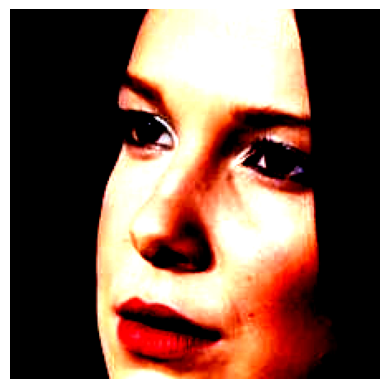

In [ ]:
image_tensor = train_dataset[3][0]

# Convert the image tensor to a NumPy array and rearrange the dimensions
# Assuming the tensor is in (C, H, W) format (channels, height, width)
image_np = np.transpose(image_tensor.numpy(), (1, 2, 0))

# Display the image
plt.imshow(image_np)
plt.axis('off')
plt.show()

### **Redefine Model**

In [ ]:
# use torch-summary for more info on the model
!pip install torchinfo

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install transformers


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

2024-04-25 01:42:20.371577: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 01:42:32.430834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
#print(model)

In [ ]:
model.classifier = torch.nn.Sequential(torch.nn.Linear(768, 300), torch.nn.ReLU(), torch.nn.Linear(300, configs["num_classes"]))

In [ ]:
for param in model.parameters():
    param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True

### Loss: Cross-Entropy

In [ ]:
criterion = nn.CrossEntropyLoss()

### Optimizer: SGD

In [ ]:
optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=configs["learning_rate"], weight_decay=configs["weight_decay"])

### Training

In [ ]:
if enable_wandb:
  wandb.init(
    # Set the project where this run will be logged
    project=configs["project_name"],
    # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
    name=configs["experiment_name"],
    # Track hyperparameters and run metadata
    config=configs)

In [ ]:
def get_accuracy(dataloader, model):
  acc = 0
  # <OR>
  # acc = torchmetrics.Accuracy()

  with torch.no_grad():
      for images, labels in dataloader:
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          outputs = model(images) # get predictions

          # Update accuracy for this batch
          raw_logits = outputs.logits
          acc = acc + torch.sum(torch.argmax(raw_logits, axis=1) == labels)



      # Compute the accuracy
      acc = acc/len(dataloader.dataset) # normalizes


      return acc



In [ ]:
def get_loss(loader):
  with torch.no_grad(): # Anything under torch.no_grad will be calculated with no gradients. Can only be used for testing, not training!

    loss = 0
    for i, (images, labels) in enumerate(loader): # The batches.
          # step1: Move data to cuda. Make sure the model is on cuda too!
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          # step2: Forward pass
          outputs = model(images)


          # step 3: calculate the loss.
          raw_logits = outputs.logits
          loss = loss + criterion(raw_logits, labels)
    return loss/ len(loader)

### Early-stopping class

In [ ]:
class EarlyStopper:
    def __init__(self, patience=1):
        self.patience = patience
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        # If the new loss is lower than the old loss, reset the counter!
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
            # Keep track of the best model by saving it on the hard drive.
            torch.save(model.state_dict(), "./best_model.pt")
        # otherwise, increment the counter.
        elif validation_loss > self.min_validation_loss:
            self.counter += 1
            # If there has been too many epochs with the loss being high, terminate.
            if self.counter >= self.patience:
                return True
        return False


### Train!

In [ ]:
if gpu_available and use_gpu:
  model = model.cuda()

In [ ]:
early_stopper = EarlyStopper(patience=7)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.3, patience=3)

# Training loop
for epoch in range(configs["epochs"]): # The epochs.
    for i, (images, labels) in enumerate(train_loader): # The batches.
        # step 1: Zero out the gradients.
        optimizer.zero_grad()

        # step 1.1 move data to cuda. Make sure the model is on cuda too!
        if gpu_available and use_gpu:
          images = images.cuda()
          labels = labels.cuda()

        # step2: Forward pass
        outputs = model(images)

        # step 3: calculate the loss.
        raw_logits = outputs.logits
        loss = criterion(raw_logits, labels)

        # step 4: Backward pass
        loss.backward()
        optimizer.step()

        # Print the loss
        if i %100 == 0:
          print("Epoch", epoch+ 1, " batch", i+1, ". Training Loss: ", loss.item())
          if enable_wandb:
            wandb.log({"loss": loss})

    # Compute total train accuracy
    train_acc = get_accuracy(train_loader, model)
    test_acc = get_accuracy(val_loader, model)

    validation_loss = get_loss(val_loader)
    wandb.log({"val_loss": validation_loss})

    print(f'Epoch [{epoch + 1}/{configs["epochs"]}], LR: {optimizer.param_groups[0]["lr"]}, Validation Loss: {validation_loss.item():.4f}, Train Accuracy: {train_acc.item():.4f}, Validation Accuracy: {test_acc.item():.4f}')
    if enable_wandb:
      wandb.log({"epoch": epoch + 1, "LR": {optimizer.param_groups[0]['lr']}, "train_accuracy": train_acc.item(), "val_accuracy": test_acc.item()})

    scheduler.step(validation_loss)

    if early_stopper.early_stop(validation_loss):
        print("Validation loss hasn't dropped. Early stopping!")
        break



Epoch 1  batch 1 . Training Loss:  3.911203384399414
Epoch 1  batch 101 . Training Loss:  3.850461721420288
Epoch 1  batch 201 . Training Loss:  3.846036434173584
Epoch 1  batch 301 . Training Loss:  3.699610471725464
Epoch 1  batch 401 . Training Loss:  3.7365236282348633
Epoch [1/10], LR: 0.001, Validation Loss: 3.6456, Train Accuracy: 0.1498, Validation Accuracy: 0.1149
Epoch 2  batch 1 . Training Loss:  3.5695202350616455
Epoch 2  batch 101 . Training Loss:  3.6043577194213867
Epoch 2  batch 201 . Training Loss:  3.5344560146331787
Epoch 2  batch 301 . Training Loss:  3.4019534587860107
Epoch 2  batch 401 . Training Loss:  3.160081148147583
Epoch [2/10], LR: 0.001, Validation Loss: 3.2347, Train Accuracy: 0.2277, Validation Accuracy: 0.1916
Epoch 3  batch 1 . Training Loss:  3.090071201324463
Epoch 3  batch 101 . Training Loss:  2.89990234375
Epoch 3  batch 201 . Training Loss:  2.741421937942505
Epoch 3  batch 301 . Training Loss:  2.828540802001953
Epoch 3  batch 401 . Training L

### Test

In [ ]:
print("last model performance on Test set:", get_accuracy(test_loader, model))

# Once training is done, load the best model (might not be the last model due to early stopping)
model.load_state_dict(torch.load("./best_model.pt"))
acc = get_accuracy(test_loader, model)
print("best model performance Test set:", acc)

if enable_wandb:
  wandb.summary['Test Accuracy'] = acc.item()

last model performance on Test set: tensor(0.4280, device='cuda:0')
best model performance Test set: tensor(0.4280, device='cuda:0')


In [ ]:
if enable_wandb:
  wandb.finish()

epoch,▁▂▃▃▄▅▆▆▇█
loss,███▇▇▇▇▆▅▅▄▄▄▄▄▄▄▃▄▄▂▄▄▃▁▂▂▁▂▂▁▃▃▂▁▁▂▂▂▂
train_accuracy,▁▂▄▅▅▆▆▇▇█
val_accuracy,▁▃▄▅▆▆▇▇██
val_loss,█▆▅▄▃▂▂▂▁▁
Test Accuracy,0.42801
epoch,10
loss,2.08497
train_accuracy,0.52029
val_accuracy,0.40369
val_loss,2.19441


## Male Model

In [ ]:
configs = {
    "project_name": "ViT-All",
    "experiment_name": "ViT-all-male-final",
    "freeze_feature_extraction_layers": True,
    "pretrained":True,
    "efficientnet":False,
    "data_augmentation":False,
    "transferlearning": True,

    # Data
    "img_dimensions" : (3,224,224),
    "batch_size" : 32,
    "num_classes" : 50,

    # CNN
    "filter_sizes" : [4,8],
    "kernel_size" : 3,
    "stride": 2,
    "padding":1,

    #Optimzation
    "learning_rate" : 0.001,
    "epochs" : 10,
    "weight_decay" : 0.00001
}

In [ ]:
main_directory = 'Male_all'

In [ ]:
# Transformations
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
if configs["data_augmentation"]:
  transform = transforms.Compose([
      transforms.RandomHorizontalFlip(0.5), # 50% of the person will flip
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.RandomCrop(224),
      transforms.RandomRotation(45), # Random rotate
      transforms.ColorJitter(),
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])
else:
  transform = transforms.Compose([
      transforms.Resize(224),       # Resize the image to 224x224 pixels while maintaining aspect ratio
      transforms.CenterCrop(224),
      transforms.ToTensor(),               # Convert the image to a PyTorch tensor
      transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize the tensor using the mean and
                      std=[0.229, 0.224, 0.225])       # standard deviation of the ImageNet dataset
  ])


import torchvision
whole_dataset = torchvision.datasets.ImageFolder(main_directory, transform=transform)
train_dataset, val_dataset = random_split(whole_dataset, [0.7, 0.3])
test_dataset, val_dataset = random_split(val_dataset, [0.5, 0.5])

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=configs["batch_size"], shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=configs["batch_size"], shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=configs["batch_size"], shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


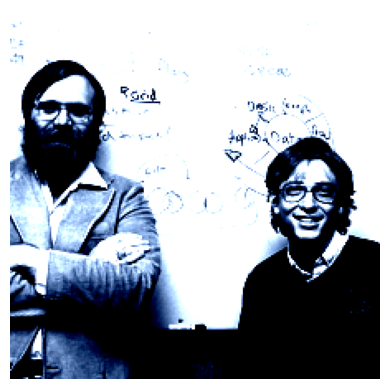

In [ ]:
image_tensor = train_dataset[3][0]

# Convert the image tensor to a NumPy array and rearrange the dimensions
# Assuming the tensor is in (C, H, W) format (channels, height, width)
image_np = np.transpose(image_tensor.numpy(), (1, 2, 0))

# Display the image
plt.imshow(image_np)
plt.axis('off')
plt.show()

### **Redefine Model**

In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

In [ ]:
#print(model)

In [ ]:
model.classifier = torch.nn.Sequential(torch.nn.Linear(768, 300), torch.nn.ReLU(), torch.nn.Linear(300, configs["num_classes"]))  # The name of the layer is fc --> remove the original layer and add these to the layer
#model

In [ ]:
for param in model.parameters():
    param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True

### Loss: Cross-Entropy

In [ ]:
criterion = nn.CrossEntropyLoss()

### Optimizer: SGD

In [ ]:
optimizer = optim.SGD(model.parameters(), momentum=0.9, lr=configs["learning_rate"], weight_decay=configs["weight_decay"])

### Training

In [ ]:
if enable_wandb:
  wandb.init(
    # Set the project where this run will be logged
    project=configs["project_name"],
    # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
    name=configs["experiment_name"],
    # Track hyperparameters and run metadata
    config=configs)

In [ ]:
def get_accuracy(dataloader, model):
  acc = 0
  # <OR>
  # acc = torchmetrics.Accuracy()

  with torch.no_grad():
      for images, labels in dataloader:
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          outputs = model(images) # get predictions

          # Update accuracy for this batch
          raw_logits = outputs.logits
          acc = acc + torch.sum(torch.argmax(raw_logits, axis=1) == labels)
          # <OR>
          # acc.update(outputs, labels)


      # Compute the accuracy
      acc = acc/len(dataloader.dataset) # normalizes
      # <OR>
      # acc = acc.compute()

      return acc



In [ ]:
def get_loss(loader):
  with torch.no_grad(): # Anything under torch.no_grad will be calculated with no gradients. Can only be used for testing, not training!

    loss = 0
    for i, (images, labels) in enumerate(loader): # The batches.
          # step1: Move data to cuda. Make sure the model is on cuda too!
          if gpu_available and use_gpu:
            images = images.cuda()
            labels = labels.cuda()

          # step2: Forward pass
          outputs = model(images)


          # step 3: calculate the loss.
          raw_logits = outputs.logits
          loss = loss + criterion(raw_logits, labels)
    return loss/ len(loader)

### Early-stopping class

In [ ]:
class EarlyStopper:
    def __init__(self, patience=1):
        self.patience = patience
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        # If the new loss is lower than the old loss, reset the counter!
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
            # Keep track of the best model by saving it on the hard drive.
            torch.save(model.state_dict(), "./best_model.pt")
        # otherwise, increment the counter.
        elif validation_loss > self.min_validation_loss:
            self.counter += 1
            # If there has been too many epochs with the loss being high, terminate.
            if self.counter >= self.patience:
                return True
        return False


### Training

In [ ]:
if gpu_available and use_gpu:
  model = model.cuda()

In [ ]:
early_stopper = EarlyStopper(patience=7)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.3, patience=3)

# Training loop
for epoch in range(configs["epochs"]): # The epochs.
    for i, (images, labels) in enumerate(train_loader): # The batches.
        # step 1: Zero out the gradients.
        optimizer.zero_grad()

        # step 1.1 move data to cuda. Make sure the model is on cuda too!
        if gpu_available and use_gpu:
          images = images.cuda()
          labels = labels.cuda()

        # step2: Forward pass
        outputs = model(images)

        # step 3: calculate the loss.
        raw_logits = outputs.logits
        loss = criterion(raw_logits, labels)

        # step 4: Backward pass
        loss.backward()
        optimizer.step()

        # Print the loss
        if i %100 == 0:
          print("Epoch", epoch+ 1, " batch", i+1, ". Training Loss: ", loss.item())
          if enable_wandb:
            wandb.log({"loss": loss})

    # Compute total train accuracy
    train_acc = get_accuracy(train_loader, model)
    test_acc = get_accuracy(val_loader, model)

    validation_loss = get_loss(val_loader)
    wandb.log({"val_loss": validation_loss})

    print(f'Epoch [{epoch + 1}/{configs["epochs"]}], LR: {optimizer.param_groups[0]["lr"]}, Validation Loss: {validation_loss.item():.4f}, Train Accuracy: {train_acc.item():.4f}, Validation Accuracy: {test_acc.item():.4f}')
    if enable_wandb:
      wandb.log({"epoch": epoch + 1, "LR": {optimizer.param_groups[0]['lr']}, "train_accuracy": train_acc.item(), "val_accuracy": test_acc.item()})

    scheduler.step(validation_loss)

    if early_stopper.early_stop(validation_loss):
        print("Validation loss hasn't dropped. Early stopping!")
        break



Epoch 1  batch 1 . Training Loss:  3.9687769412994385
Epoch 1  batch 101 . Training Loss:  3.853858709335327
Epoch 1  batch 201 . Training Loss:  3.70896315574646
Epoch 1  batch 301 . Training Loss:  3.5912258625030518
Epoch [1/10], LR: 0.001, Validation Loss: 3.3815, Train Accuracy: 0.2387, Validation Accuracy: 0.2346
Epoch 2  batch 1 . Training Loss:  3.2691848278045654
Epoch 2  batch 101 . Training Loss:  3.2220587730407715
Epoch 2  batch 201 . Training Loss:  2.951262950897217
Epoch 2  batch 301 . Training Loss:  2.62457275390625
Epoch [2/10], LR: 0.001, Validation Loss: 2.7404, Train Accuracy: 0.3578, Validation Accuracy: 0.3422
Epoch 3  batch 1 . Training Loss:  2.7593324184417725
Epoch 3  batch 101 . Training Loss:  2.893498659133911
Epoch 3  batch 201 . Training Loss:  2.5544188022613525
Epoch 3  batch 301 . Training Loss:  2.365821123123169
Epoch [3/10], LR: 0.001, Validation Loss: 2.3925, Train Accuracy: 0.4325, Validation Accuracy: 0.4008
Epoch 4  batch 1 . Training Loss:  2

### Test

In [ ]:
print("last model performance on Test set:", get_accuracy(test_loader, model))

# Once training is done, load the best model (might not be the last model due to early stopping)
model.load_state_dict(torch.load("./best_model.pt"))
acc = get_accuracy(test_loader, model)
print("best model performance Test set:", acc)

if enable_wandb:
  wandb.summary['Test Accuracy'] = acc.item()

last model performance on Test set: tensor(0.5863, device='cuda:0')
best model performance Test set: tensor(0.5863, device='cuda:0')


In [ ]:
if enable_wandb:
  wandb.finish()

epoch,▁▂▃▃▄▅▆▆▇█
loss,██▇▇▆▆▅▅▅▅▅▄▄▄▃▄▄▃▃▃▃▃▃▂▂▃▂▃▃▃▂▁▃▁▂▃▁▂▂▁
train_accuracy,▁▃▄▅▆▆▇▇██
val_accuracy,▁▃▅▆▆▇▇▇██
val_loss,█▅▄▃▃▂▂▁▁▁
Test Accuracy,0.58626
epoch,10
loss,1.25946
train_accuracy,0.65757
val_accuracy,0.55883
val_loss,1.66164


From the above result that is untuned, we compare the test accuracy between Class 50 and Class 20, It is shown that the accuracy has fallen from 0.52 to 0.42 when classes increases from 20 to 50 for the Female. For the Male model, the test accuracy has also fallen from 0.62 to 0.58. Hence we can conclude that given our data size, increasing classes lead to poorer accuracy performance.